In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
# from scipy.optimize import curve_fit
import struct
# from lmfit import create_params, fit_report, minimize
# from multiprocessing import Pool

# $64^3$ CII map 2-20 $\sigma = L/\sqrt{N}$

In [21]:
n = 64
gs = 0.56
rmin = 2
rmax = 20
nr = 9
indir = '../outputs/output_64/'
step = int((rmax - rmin)/nr)

In [28]:
r = []
N = []
L = []
struct_format = 'iiiif'

for i in range(rmin,rmax+1,step):
    r.append(i)
    rval = format(gs*i, '.2f')
    with open(f'{indir}N_values_{rval}Mpc','rb') as f:
        vals = []
        while True:
            data = f.read(struct.calcsize(struct_format))
            if not data:
                break
            integers = struct.unpack(struct_format, data)
            vals.append(integers)
        vals = np.array(vals)
        N.append(vals[:,3])
        L.append(vals[:,4])

pos = vals[:,:3]
r = np.array(r)
N = np.array(N)
L = np.array(L)

In [29]:
print(N[:,600])

[1.6000e+01 1.3200e+02 5.4400e+02 1.2920e+03 2.6790e+03 4.8370e+03
 7.8090e+03 1.1553e+04 1.6098e+04 2.2018e+04]


In [30]:
num = np.random.randint(n**3)
print(np.log10(L[:,num]))
print(N[:,num])

[ 8.08336838  9.13950764  9.6513065  10.02484721 10.31306976 10.52744147
 10.70434156 10.85080045 10.98977807 11.1229441 ]
[1.9000e+01 2.1000e+02 7.2600e+02 1.6960e+03 3.2630e+03 5.4890e+03
 8.4850e+03 1.2230e+04 1.7024e+04 2.3114e+04]


In [31]:
np.shape(pos)

(262144, 3)

In [32]:
print(pos[np.random.randint(n**3),:])

[ 6. 33. 19.]


In [33]:
print(N[:,600])

[1.6000e+01 1.3200e+02 5.4400e+02 1.2920e+03 2.6790e+03 4.8370e+03
 7.8090e+03 1.1553e+04 1.6098e+04 2.2018e+04]


In [34]:
print(np.log10(L[:,np.random.randint(n**3)]))

[ 8.21107037  9.02924091  9.48302614  9.86474346 10.16170468 10.36861388
 10.56587996 10.71735784 10.86769055 11.01465652]


In [35]:
# data = N[:,900]
# fit_params = create_params(A = 1.0, D = 1.0)
# out = minimize(residual, fit_params, args=(r,), kws={'data': data})
# out.params
# # D.append(out.params.valuesdict()['D'])
# # reduced.append(out.redchi)

In [36]:
# out.uvars['A']

In [37]:
# out.params.valuesdict()

In [38]:
# print(out.success)

In [39]:
# print(fit_report(out))

In [40]:
# popt, pcov = curve_fit(pl, r, N[:,5])
# sigma = np.sqrt(N[:,5])
# chisq = sum(((N[:,5] - pl(r, *popt))/sigma)**2)
# reduced = chisq/(len(N[:,5])-2)

In [41]:
# plt.rcParams['figure.figsize'] = (10,8)
# plt.plot(r, N[:,5], 'o', label = "Observed values")
# plt.plot(r, pl(r, *popt), label = "Fitted curve")
# plt.legend()
# plt.show()

In [42]:
f = open('../fit_results/fit_results_2-20.bin', 'rb')
struct_format = 'iiifff'
size = struct.calcsize(struct_format)
A = []
D = []
redchisq = []

while True:
    data = f.read(size)
    if not data:
        break
    vals = struct.unpack(struct_format, data)
    if vals[5] <= 1.2:
        A.append(vals[3])
        D.append(vals[4])
        redchisq.append(vals[5])

f.close()
    
A = np.array(A)    
D = np.array(D)
redchisq = np.array(redchisq)

In [43]:
n = 64
len(D)/n**3

0.020965576171875

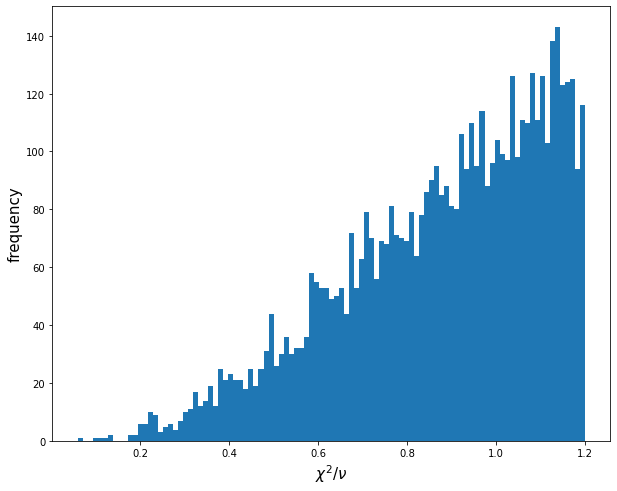

In [44]:
plt.rcParams['figure.figsize'] = (10,8)
plt.hist(redchisq,
         bins = 101,
        #  bins = np.linspace(0,2,101)
        )
plt.xlabel(r'$\chi^2/\nu$', fontsize = 15)
plt.ylabel('frequency', fontsize = 15)
plt.show()

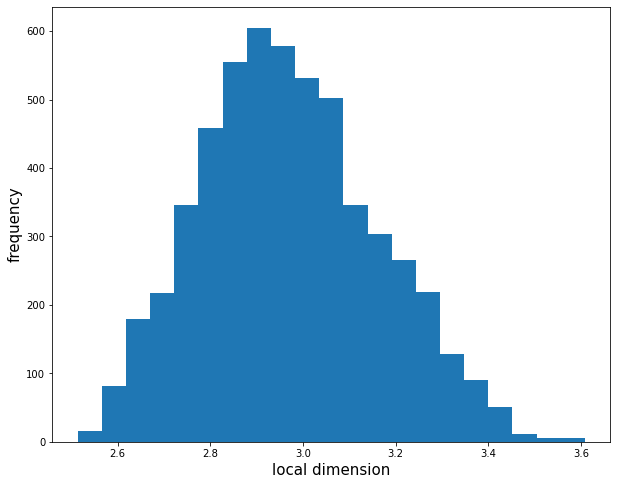

In [45]:
plt.rcParams['figure.figsize'] = (10,8)
plt.hist(D,
         bins = 21
         # bins = np.linspace(2,4,101)
        )
plt.xlabel('local dimension', fontsize = 15)
plt.ylabel('frequency', fontsize = 15)
plt.show()

In [46]:
print(np.min(D), np.max(D), np.mean(D))

2.513695240020752 3.6088521480560303 2.970304724430934


In [62]:
# num = np.random.randint(n**3)
# plt.plot(r, L[:,num], label = 'data')
# plt.plot(r, A[num]*r**D[num], label = 'model')
# plt.yscale('log')
# plt.legend()
# plt.show()

# $64^3$ CII map 10-20 $\sigma = L/\sqrt{N}$

In [2]:
n = 64
gs = 0.56
rmin = 10
rmax = 20
nr = 10
indir = '../outputs/output_64/'
step = int((rmax - rmin)/nr)

In [3]:
r = []
N = []
L = []
struct_format = 'iiiif'

for i in range(rmin,rmax+1,step):
    r.append(i)
    rval = format(gs*i, '.2f')
    with open(f'{indir}N_values_{rval}Mpc','rb') as f:
        vals = []
        while True:
            data = f.read(struct.calcsize(struct_format))
            if not data:
                break
            integers = struct.unpack(struct_format, data)
            vals.append(integers)
        vals = np.array(vals)
        N.append(vals[:,3])
        L.append(vals[:,4])

pos = vals[:,:3]
r = np.array(r)
N = np.array(N)
L = np.array(L)

In [4]:
print(N[:,600])

[ 2679.  3682.  4837.  6202.  7809.  9535. 11553. 13650. 16098. 18851.
 22018.]


In [5]:
num = np.random.randint(n**3)
print(np.log10(L[:,num]))
print(N[:,num])

[10.15031167 10.29609946 10.41540531 10.52727031 10.62806809 10.71607088
 10.80053523 10.87225429 10.94054846 11.00378359 11.0678882 ]
[ 2713.  3664.  4768.  6114.  7712.  9410. 11438. 13549. 15998. 18706.
 21780.]


In [6]:
np.shape(pos)

(262144, 3)

In [7]:
print(pos[np.random.randint(n**3),:])

[36. 61. 31.]


In [8]:
print(N[:,600])

[ 2679.  3682.  4837.  6202.  7809.  9535. 11553. 13650. 16098. 18851.
 22018.]


In [9]:
print(np.log10(L[:,np.random.randint(n**3)]))

[10.21441565 10.317747   10.41821829 10.52697132 10.64666206 10.74459289
 10.83239514 10.9058828  10.97893026 11.04454725 11.10692423]


In [3]:
f = open('../fit_results/Nvalues_10-20.bin', 'rb')
struct_format = 'iiifff'
size = struct.calcsize(struct_format)
# A = []
D = []
# redchisq = []

while True:
    data = f.read(size)
    if not data:
        break
    vals = struct.unpack(struct_format, data)
    if vals[5] <= 1.2:
        # A.append(vals[3])
        D.append(vals[4])
        # redchisq.append(vals[5])

f.close()
    
# A = np.array(A)    
D = np.array(D)
# redchisq = np.array(redchisq)

In [4]:
n = 64
len(D)/n**3

0.73077392578125

In [12]:
np.mean(A)

17501533.01583666

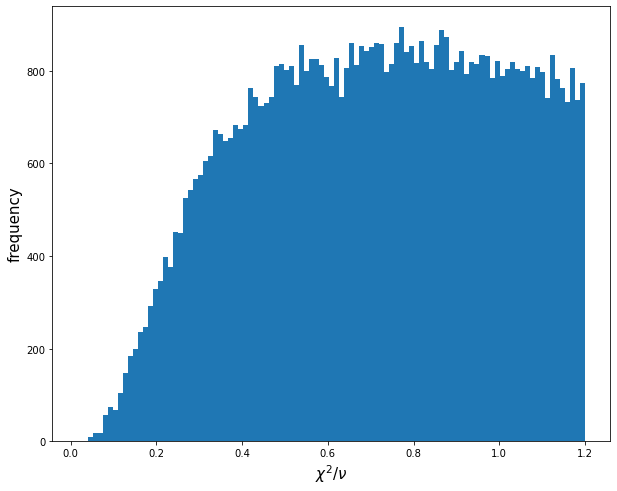

In [13]:
plt.rcParams['figure.figsize'] = (10,8)
plt.hist(redchisq,
         bins = 101,
        #  bins = np.linspace(0,2,101)
        )
plt.xlabel(r'$\chi^2/\nu$', fontsize = 15)
plt.ylabel('frequency', fontsize = 15)
plt.show()

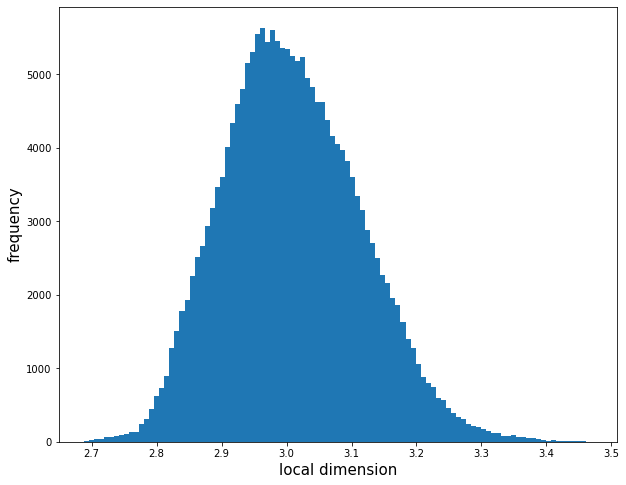

In [5]:
plt.rcParams['figure.figsize'] = (10,8)
plt.hist(D,
         bins = 101
         # bins = np.linspace(2,4,101)
        )
plt.xlabel('local dimension', fontsize = 15)
plt.ylabel('frequency', fontsize = 15)
plt.show()

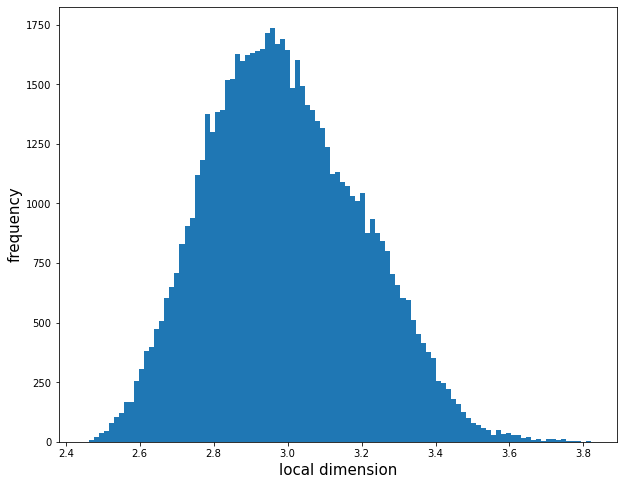

In [ ]:
plt.rcParams['figure.figsize'] = (10,8)
plt.hist(D,
         bins = 101
         # bins = np.linspace(2,4,101)
        )
plt.xlabel('local dimension', fontsize = 15)
plt.ylabel('frequency', fontsize = 15)
plt.show()

In [15]:
print(np.min(D), np.max(D), np.mean(D))

2.4494290351867676 3.821408271789551 2.992477293250915


In [61]:
# num = np.random.randint(n**3)
# plt.plot(r, L[:,num], label = 'data')
# plt.plot(r, A[num]*r**D[num], label = 'model')
# plt.yscale('log')
# plt.legend()
# plt.show()

# $384^3$ CII map 2-10 $\sigma = L/\sqrt{N}$

In [34]:
n = 384

In [35]:
f = open('../fit_results/fit_results_384_z2.520_2-10.bin', 'rb')
struct_format = 'iiifff'
size = struct.calcsize(struct_format)

# pos = []
A = []
# D = []
# redchisq = []

while True:
    data = f.read(size)
    if not data:
        break
    vals = struct.unpack(struct_format, data)
    if vals[5] <= 1.4:
        # pos.append(np.array(vals[:3]))
        A.append(vals[3])
        # D.append(vals[4])
        # redchisq.append(vals[5])

f.close()

# pos = np.array(pos)
A = np.array(A)
# D = np.array(D)
# redchisq = np.array(redchisq)

In [38]:
np.mean(A)

1294537.3771968025

In [11]:
len(D)/n**3

0.005476651368317781

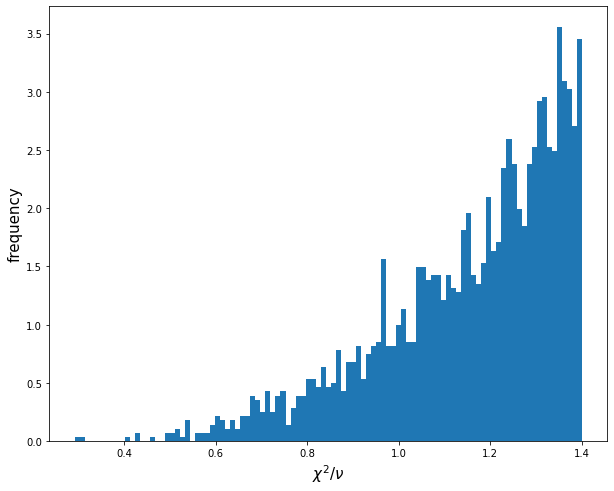

In [12]:
plt.rcParams['figure.figsize'] = (10,8)
plt.hist(redchisq,
         bins = 101,
        #  bins = np.linspace(0,20,101),
         density = True,
         # bins = np.linspace(0,20,501)
        )
# plt.xscale('log')
plt.xlabel(r'$\chi^2/\nu$', fontsize = 15)
plt.ylabel('frequency', fontsize = 15)
plt.show()

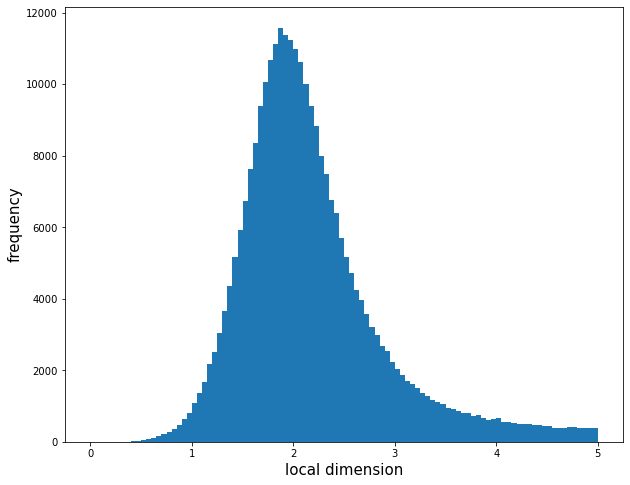

In [13]:
plt.rcParams['figure.figsize'] = (10,8)
plt.hist(D,
         # bins = 501
         bins = np.linspace(0,5,101)
        )
# plt.xlim(0,5)
plt.xlabel('local dimension', fontsize = 15)
plt.ylabel('frequency', fontsize = 15)
plt.show()

In [26]:
f = open('../maps/CII_map_z2.520_384^3.bin','rb')
map = np.fromfile(f, count = n**3, dtype = 'float32')
f.close()
map_grid = map.reshape((n,n,n), order = 'C')

In [29]:
D_grid = np.zeros((n,n,n))
for i in range(len(D)):
    D_grid[pos[i,0],pos[i,1],pos[i,2]] = D[i]

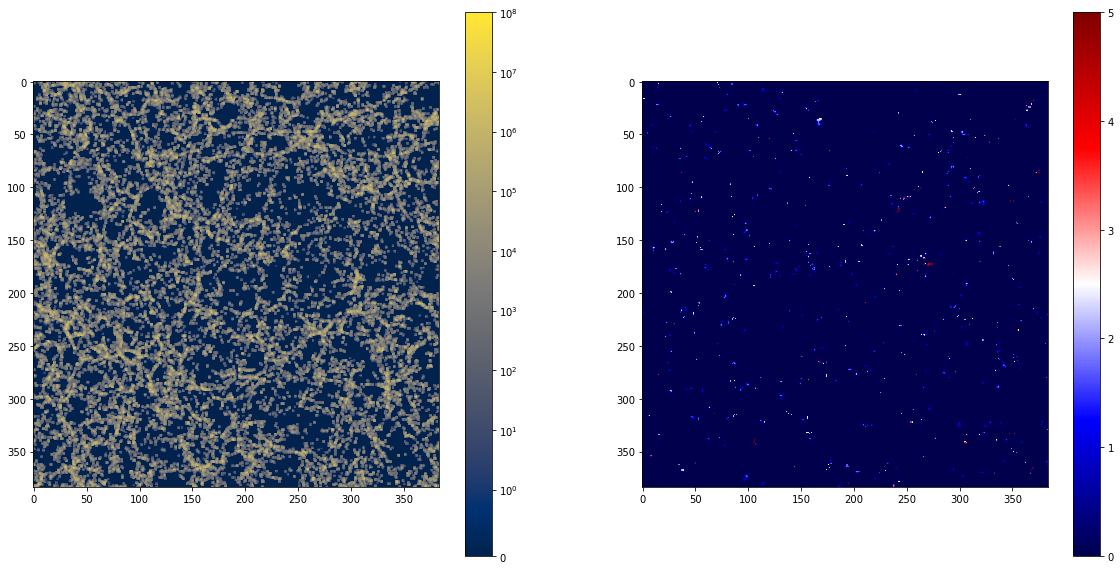

In [30]:
slice = np.random.randint(n)
# plt.rcParams['figure.figsize'] = (20, 20)
fig, [ax1, ax2] = plt.subplots(1, 2)
im1 = ax1.imshow(map_grid[:,:,slice],cmap='cividis',
                 norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=0, vmax=1e8)
                 )
fig.colorbar(im1,ax=ax1,
             shrink = 0.5
             )
im2 = ax2.imshow(D_grid[:,:,slice],cmap='seismic',
                 vmin = 0,
                 vmax = 5
                 )
fig.colorbar(im2,ax=ax2,
             shrink = 0.5
             )
plt.show()

# $384^3$ CII map 2-20 $\sigma = L/\sqrt{N}$

In [34]:
n = 384

In [36]:
f = open('../fit_results/fit_results_384_z2.520.bin', 'rb')
struct_format = 'iiifff'
size = struct.calcsize(struct_format)

# pos = []
# A = []
D = []
# redchisq = []

while True:
    data = f.read(size)
    if not data:
        break
    vals = struct.unpack(struct_format, data)
    if vals[5] <= 1.5:
        # pos.append(np.array(vals[:3]))
        # A.append(vals[3])
        D.append(vals[4])
        # redchisq.append(vals[5])

f.close()

# pos = np.array(pos)
# A = np.array(A)
D = np.array(D)
# redchisq = np.array(redchisq)

In [33]:
np.mean(A)

1905841.6871575937

In [37]:
len(D)/n**3

6.304846869574653e-05

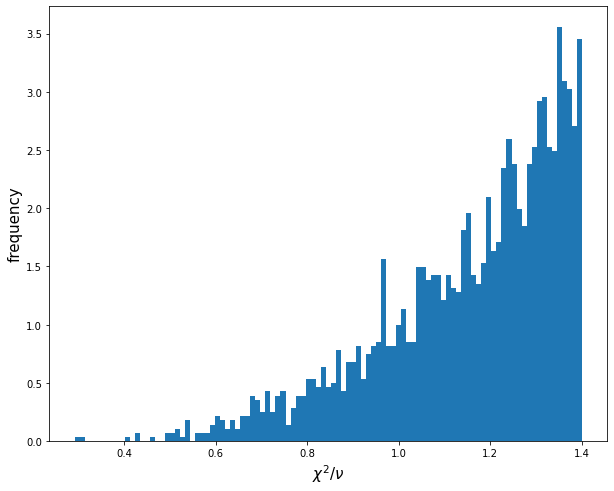

In [35]:
plt.rcParams['figure.figsize'] = (10,8)
plt.hist(redchisq,
         bins = 101,
        #  bins = np.linspace(0,20,101),
         density = True,
         # bins = np.linspace(0,20,501)
        )
# plt.xscale('log')
plt.xlabel(r'$\chi^2/\nu$', fontsize = 15)
plt.ylabel('frequency', fontsize = 15)
plt.show()

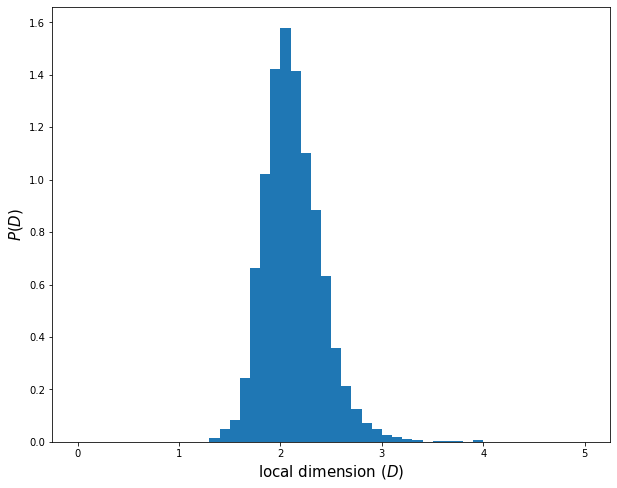

In [41]:
plt.rcParams['figure.figsize'] = (10,8)
plt.hist(D,
         # bins = 501
         bins = np.linspace(0,5,51),
         density = True
        )
# plt.xlim(0,5)
plt.xlabel(r'local dimension ($D$)', fontsize = 15)
plt.ylabel(r'$P(D)$', fontsize = 15)
# plt.savefig('hist_2-20.png')
plt.show()

In [37]:
f = open('../maps/CII_map_z2.520_384^3.bin','rb')
map = np.fromfile(f, count = n**3, dtype = 'float32')
f.close()
map_grid = map.reshape((n,n,n), order = 'C')

In [38]:
D_grid = np.zeros((n,n,n))
for i in range(len(D)):
    D_grid[pos[i,0],pos[i,1],pos[i,2]] = D[i]

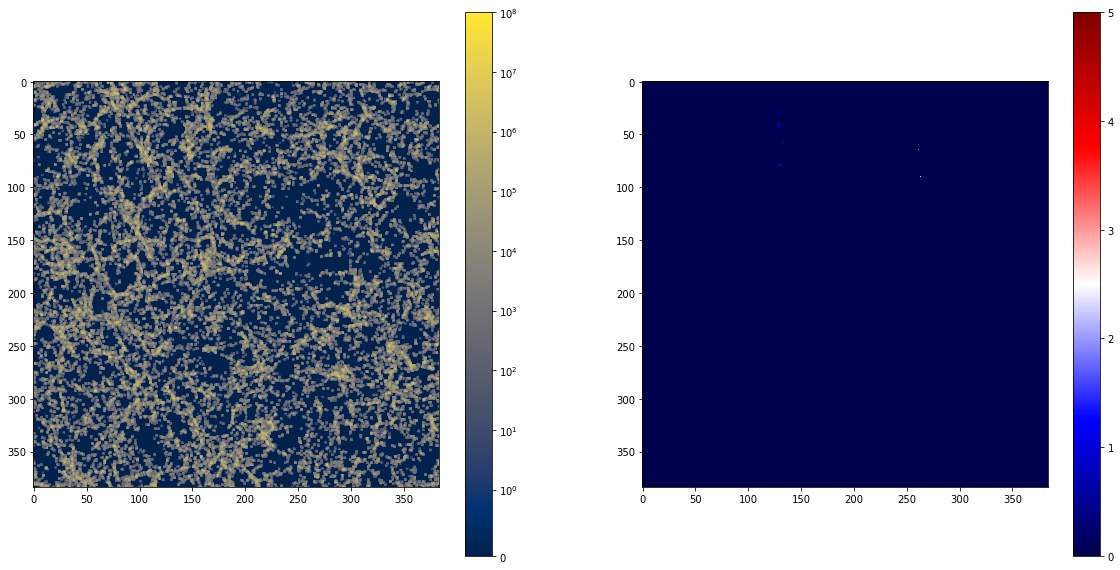

In [40]:
slice = np.random.randint(n)
plt.rcParams['figure.figsize'] = (20, 20)
fig, [ax1, ax2] = plt.subplots(1, 2)
im1 = ax1.imshow(map_grid[:,:,slice],cmap='cividis',
                 norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=0, vmax=1e8)
                 )
fig.colorbar(im1,ax=ax1,
             shrink = 0.5
             )
im2 = ax2.imshow(D_grid[:,:,slice],cmap='seismic',
                 vmin = 0,
                 vmax = 5
                 )
fig.colorbar(im2,ax=ax2,
             shrink = 0.5
             )
plt.show()

# $384^3$ CII map 10-20 $\sigma = L/\sqrt{N}$

In [8]:
n = 384
gs = 0.56
rmin = 10
rmax = 20
nr = 10
# indir = '../outputs/output_64/'
step = int((rmax - rmin)/nr)

In [9]:
# r = []
# N = []
# L = []
# struct_format = 'iiiif'

# for i in range(rmin,rmax+1,step):
#     r.append(i)
#     rval = format(gs*i, '.2f')
#     with open(f'{indir}N_values_{rval}Mpc','rb') as f:
#         vals = []
#         while True:
#             data = f.read(struct.calcsize(struct_format))
#             if not data:
#                 break
#             integers = struct.unpack(struct_format, data)
#             vals.append(integers)
#         vals = np.array(vals)
#         N.append(vals[:,3])
#         L.append(vals[:,4])

# pos = vals[:,:3]
# r = np.array(r)
# N = np.array(N)
# L = np.array(L)

In [11]:
f = open('../fit_results/fit_results_10-20.bin', 'rb')
struct_format = 'iiifff'
size = struct.calcsize(struct_format)

# pos = []
A = []
# D = []
# redchisq = []

while True:
    data = f.read(size)
    if not data:
        break
    vals = struct.unpack(struct_format, data)
    if vals[5] <= 1.5:
        # pos.append(np.array(vals[:3]))
        A.append(vals[3])
        # D.append(vals[4])
        # redchisq.append(vals[5])

f.close()

# pos = np.array(pos)
A = np.array(A)
# D = np.array(D)
# redchisq = np.array(redchisq)

In [12]:
np.mean(A)

1170137.074648129

In [27]:
len(D)/n**3

0.011310294822410302

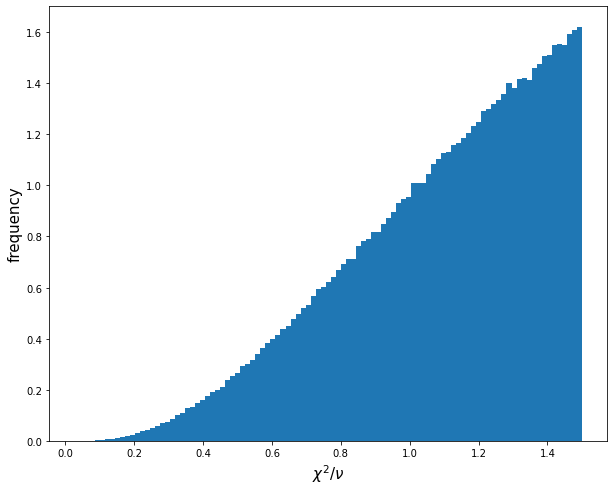

In [12]:
plt.rcParams['figure.figsize'] = (10,8)
plt.hist(redchisq,
         bins = 101,
        #  bins = np.linspace(0,20,101),
         density = True,
         # bins = np.linspace(0,20,501)
        )
# plt.xscale('log')
plt.xlabel(r'$\chi^2/\nu$', fontsize = 15)
plt.ylabel('frequency', fontsize = 15)
plt.show()

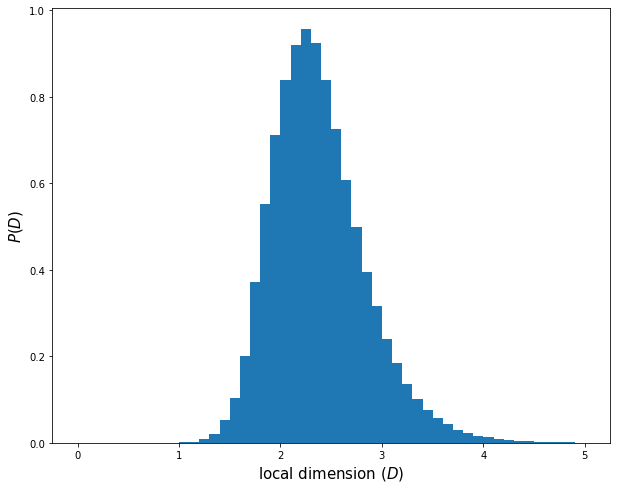

In [28]:
plt.rcParams['figure.figsize'] = (10,8)
plt.hist(D,
        #  bins = 501
         bins = np.linspace(0,5,51),
         density = True
        )
# plt.xlim(0,5)
plt.xlabel(r'local dimension ($D$)', fontsize = 15)
plt.ylabel(r'$P(D)$', fontsize = 15)
# plt.savefig('hist_10-20.png')
plt.show()

In [7]:
f = open('../maps/CII_map_z2.520_384^3.bin','rb')
map = np.fromfile(f, count = n**3, dtype = 'float32')
f.close()
map_grid = map.reshape((n,n,n), order = 'C')

In [ ]:
num = np.random.randint(len(D))
fig,ax = plt.subplots(figsize = (10,10))
ax.plot(r, L[:,num], label = 'data')
ax.plot(r, A[num]*r**D[num], label = 'model')
ax.set_yscale('log')
# ax.legend()
plt.show()

In [8]:
D_grid = np.zeros((n,n,n))
for i in range(len(D)):
    D_grid[pos[i,0],pos[i,1],pos[i,2]] = D[i]

NameError: name 'pos' is not defined

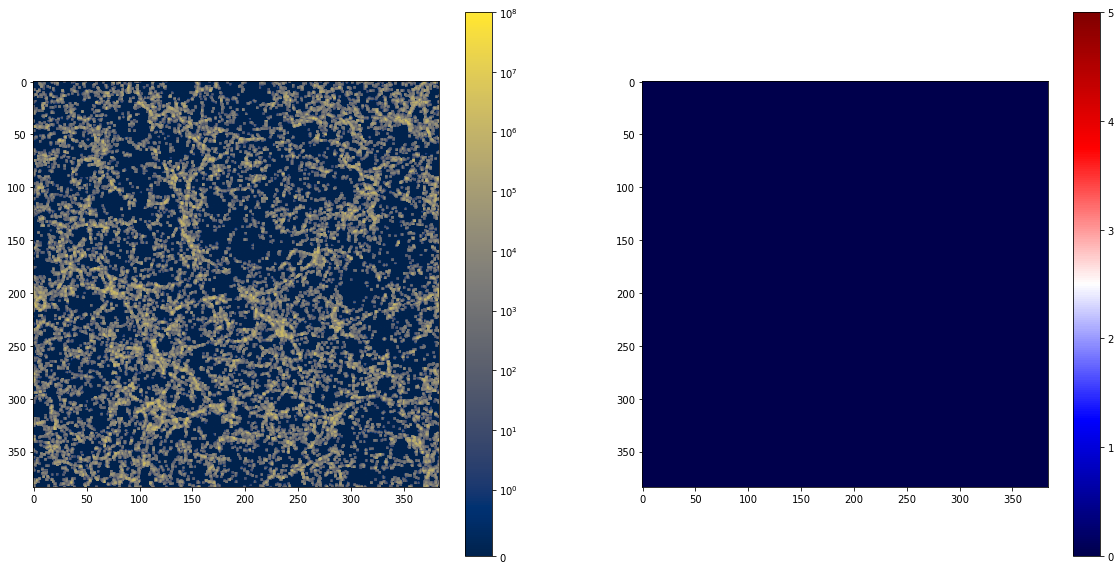

In [9]:
slice = np.random.randint(n)
plt.rcParams['figure.figsize'] = (20, 20)
fig, [ax1, ax2] = plt.subplots(1, 2)
im1 = ax1.imshow(map_grid[:,:,slice],cmap='cividis',
                 norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=0, vmax=1e8)
                 )
fig.colorbar(im1,ax=ax1,
             shrink = 0.5
             )
im2 = ax2.imshow(D_grid[:,:,slice],cmap='seismic',
                 vmin = 0,
                 vmax = 5
                 )
fig.colorbar(im2,ax=ax2,
             shrink = 0.5
             )
plt.show()

# $384^3$ CII map 10-36 (5-20 Mpc) $\sigma = L/\sqrt{N}$
14 data points

In [29]:
n = 384

In [30]:
f = open('../fit_results/fit_results_10-36_step2.bin', 'rb')
struct_format = 'iiifff'
size = struct.calcsize(struct_format)

# pos = []
# A = []
D = []
# redchisq = []

while True:
    data = f.read(size)
    if not data:
        break
    vals = struct.unpack(struct_format, data)
    if vals[5] <= 1.5:
        # pos.append(np.array(vals[:3]))
        # A.append(vals[3])
        D.append(vals[4])
        # redchisq.append(vals[5])

f.close()

# pos = np.array(pos)
# A = np.array(A)
D = np.array(D)
# redchisq = np.array(redchisq)

In [ ]:
np.mean(A)

1170137.074648129

In [19]:
len(D)/n**3

1.6159481472439235e-05

In [5]:
plt.rcParams['figure.figsize'] = (10,8)
plt.hist(redchisq,
         bins = 101,
        #  bins = np.linspace(0,20,101),
         density = True,
         # bins = np.linspace(0,20,501)
        )
# plt.xscale('log')
plt.xlabel(r'$\chi^2/\nu$', fontsize = 15)
plt.ylabel('frequency', fontsize = 15)
plt.show()

NameError: name 'redchisq' is not defined

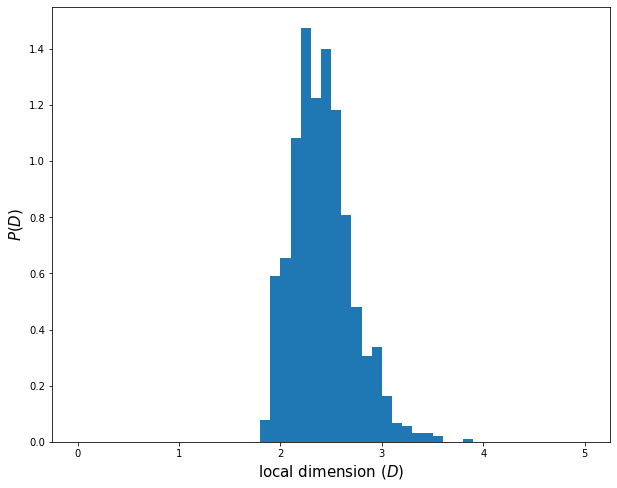

In [33]:
plt.rcParams['figure.figsize'] = (10,8)
plt.hist(D,
         # bins = 501
         bins = np.linspace(0,5,51),
         density = True
        )
# plt.xlim(0,5)
plt.xlabel(r'local dimension ($D$)', fontsize = 15)
plt.ylabel(r'$P(D)$', fontsize = 15)
# plt.savefig('hist_10-36_step2.png')
plt.show()

In [ ]:
f = open('../maps/CII_map_z2.520_384^3.bin','rb')
map = np.fromfile(f, count = n**3, dtype = 'float32')
f.close()
map_grid = map.reshape((n,n,n), order = 'C')

In [ ]:
D_grid = np.zeros((n,n,n))
for i in range(len(D)):
    D_grid[pos[i,0],pos[i,1],pos[i,2]] = D[i]

NameError: name 'pos' is not defined

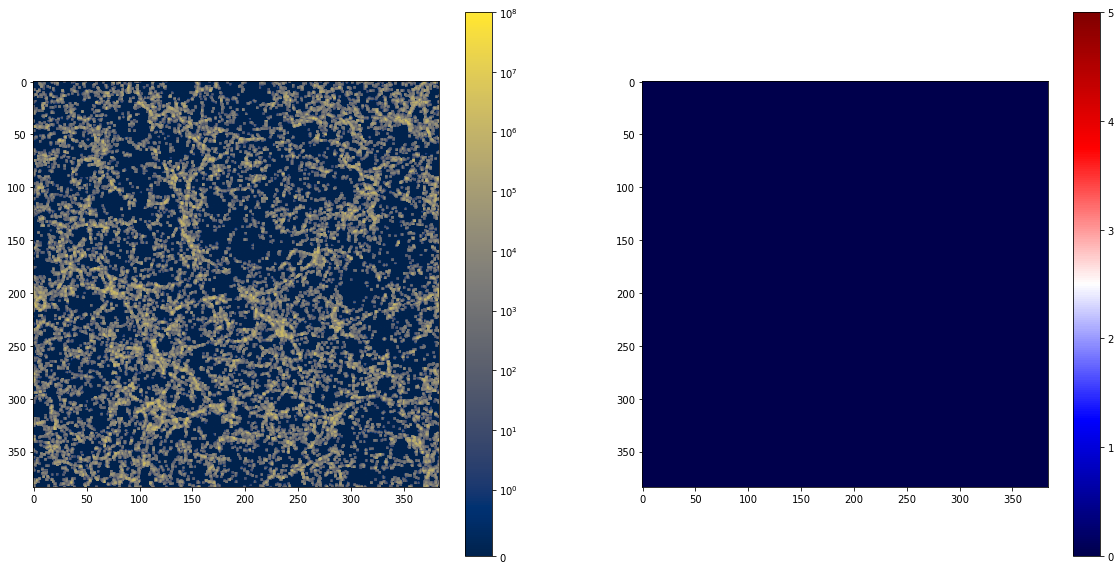

In [ ]:
slice = np.random.randint(n)
plt.rcParams['figure.figsize'] = (20, 20)
fig, [ax1, ax2] = plt.subplots(1, 2)
im1 = ax1.imshow(map_grid[:,:,slice],cmap='cividis',
                 norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=0, vmax=1e8)
                 )
fig.colorbar(im1,ax=ax1,
             shrink = 0.5
             )
im2 = ax2.imshow(D_grid[:,:,slice],cmap='seismic',
                 vmin = 0,
                 vmax = 5
                 )
fig.colorbar(im2,ax=ax2,
             shrink = 0.5
             )
plt.show()

# $384^3$ CII map 10-36 (5-20 Mpc) $\sigma = L/\sqrt{N}$
27 data points

In [2]:
n = 384

In [3]:
f = open('../fit_results/fit_results_10-36_step1.bin', 'rb')
struct_format = 'iiifff'
size = struct.calcsize(struct_format)

# pos = []
# A = []
D = []
# redchisq = []

while True:
    data = f.read(size)
    if not data:
        break
    vals = struct.unpack(struct_format, data)
    if vals[5] <= 1.5:
        # pos.append(np.array(vals[:3]))
        # A.append(vals[3])
        D.append(vals[4])
        # redchisq.append(vals[5])

f.close()

# pos = np.array(pos)
# A = np.array(A)
D = np.array(D)
# redchisq = np.array(redchisq)

In [ ]:
np.mean(A)

1170137.074648129

In [4]:
len(D)/n**3

1.2609693739149305e-05

In [ ]:
plt.rcParams['figure.figsize'] = (10,8)
plt.hist(redchisq,
         bins = 101,
        #  bins = np.linspace(0,20,101),
         density = True,
         # bins = np.linspace(0,20,501)
        )
# plt.xscale('log')
plt.xlabel(r'$\chi^2/\nu$', fontsize = 15)
plt.ylabel('frequency', fontsize = 15)
plt.show()

NameError: name 'redchisq' is not defined

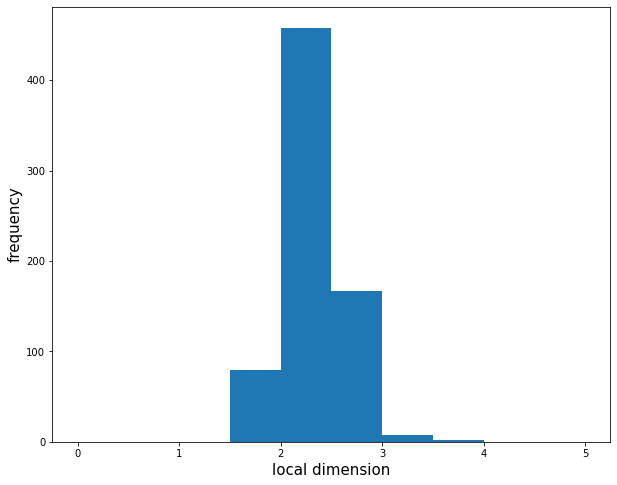

In [5]:
plt.rcParams['figure.figsize'] = (10,8)
plt.hist(D,
         # bins = 501
         bins = np.linspace(0,5,11),
        )
# plt.xlim(0,5)
plt.xlabel('local dimension', fontsize = 15)
plt.ylabel('frequency', fontsize = 15)
plt.show()

In [ ]:
f = open('../maps/CII_map_z2.520_384^3.bin','rb')
map = np.fromfile(f, count = n**3, dtype = 'float32')
f.close()
map_grid = map.reshape((n,n,n), order = 'C')

In [ ]:
D_grid = np.zeros((n,n,n))
for i in range(len(D)):
    D_grid[pos[i,0],pos[i,1],pos[i,2]] = D[i]

NameError: name 'pos' is not defined

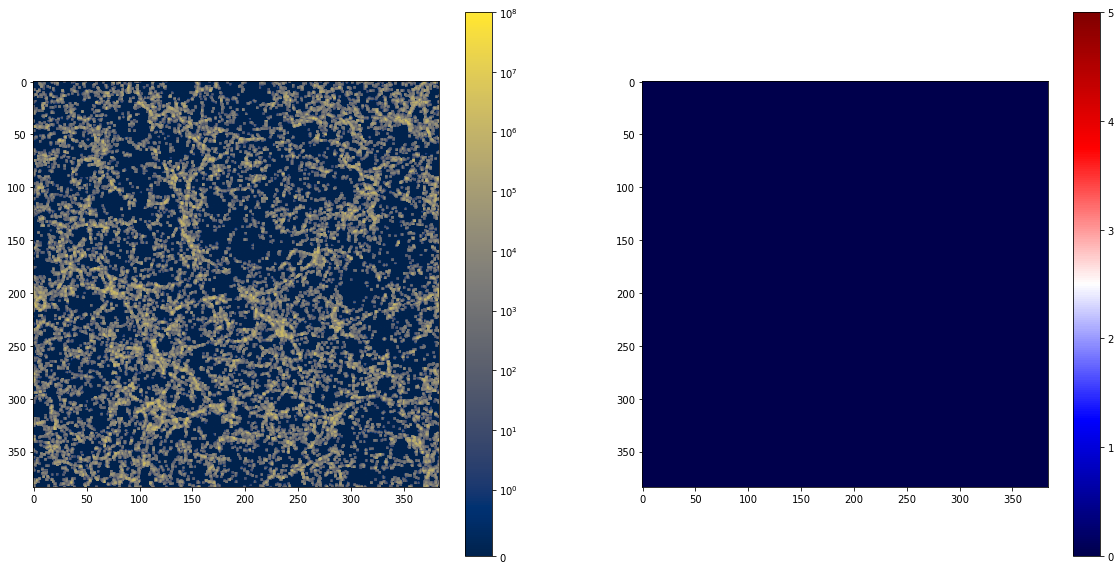

In [ ]:
slice = np.random.randint(n)
plt.rcParams['figure.figsize'] = (20, 20)
fig, [ax1, ax2] = plt.subplots(1, 2)
im1 = ax1.imshow(map_grid[:,:,slice],cmap='cividis',
                 norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=0, vmax=1e8)
                 )
fig.colorbar(im1,ax=ax1,
             shrink = 0.5
             )
im2 = ax2.imshow(D_grid[:,:,slice],cmap='seismic',
                 vmin = 0,
                 vmax = 5
                 )
fig.colorbar(im2,ax=ax2,
             shrink = 0.5
             )
plt.show()

In [3]:
a = np.array([2,3,5])
a**2

array([ 4,  9, 25])

# $64^3$ uniform particle density 10-20

In [2]:
n = 64
gs = 0.56
rmin = 10
rmax = 20
nr = 10
indir = '../outputs/output_uniform_particle_density/'
step = int((rmax - rmin)/nr)

In [15]:
r = []
N = []
L = []
struct_format = 'iiiif'

for i in range(rmin,rmax+1,step):
    r.append(i)
    rval = format(gs*i, '.2f')
    with open(f'{indir}N_values_{rval}Mpc','rb') as f:
        vals = []
        while True:
            data = f.read(struct.calcsize(struct_format))
            if not data:
                break
            integers = struct.unpack(struct_format, data)
            vals.append(integers)
        vals = np.array(vals)
        N.append(vals[:,3])
        L.append(vals[:,4])

pos = vals[:,:3]
r = np.array(r)
N = np.array(N)
L = np.array(L)

In [16]:
num = np.random.randint(n**3)
print(N[:,num])


[ 3052.  4049.  5205.  6617.  8321. 10121. 12262. 14648. 17483. 20459.
 23849.]


In [3]:
f = open('../fit_results/fit_results_uniform_64_10-20.bin', 'rb')
struct_format = 'iiifff'
size = struct.calcsize(struct_format)

# pos = []
A = []
D = []
# redchisq = []

while True:
    data = f.read(size)
    if not data:
        break
    vals = struct.unpack(struct_format, data)

    if vals[5] <= 1.2:
        # pos.append(np.array(vals[:3]))
        A.append(vals[3])
        D.append(vals[4])
        # redchisq.append(vals[5])

f.close()

# pos = np.array(pos)
A = np.array(A)
D = np.array(D)
# redchisq = np.array(redchisq)

In [4]:
print(np.min(D), np.max(D), np.mean(D))

2.8076703548431396 3.197646379470825 3.013731212810815


In [5]:
np.mean(A)

0.7039726890855887

In [6]:
len(D)/n**3

0.9712562561035156

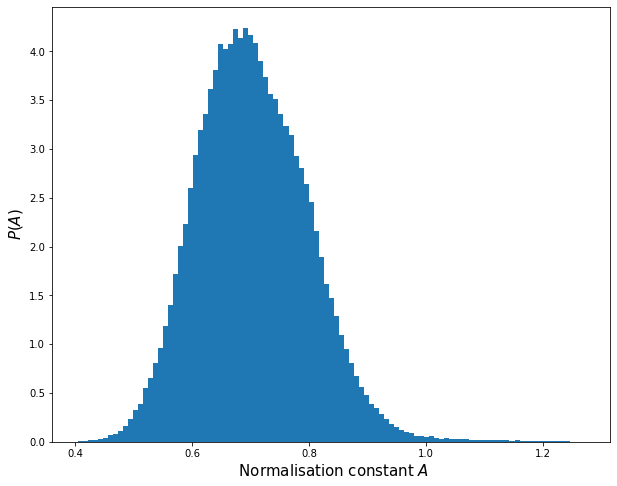

In [9]:
plt.rcParams['figure.figsize'] = (10,8)
plt.hist(A,
         bins = 101,
        #  bins = np.linspace(0,20,101),
         density = True,
        #  bins = np.linspace(0,20,501)
        )
# plt.xscale('log')
# plt.xlabel(r'$\chi^2/\nu$', fontsize = 15)
plt.xlabel(r' Normalisation constant $A$', fontsize = 15)
plt.ylabel(r'$P(A)$', fontsize = 15)
plt.show()

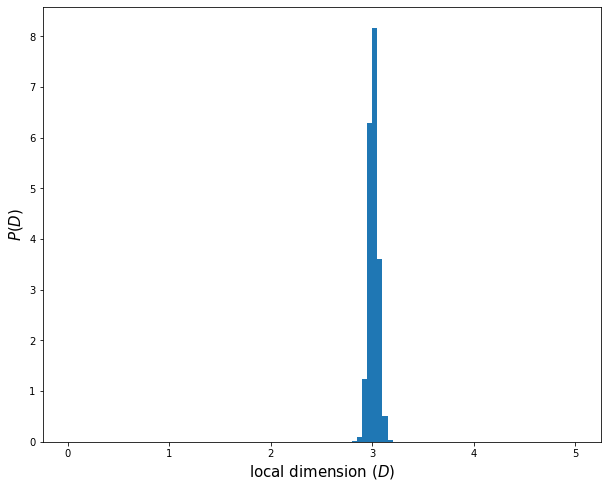

In [7]:
plt.rcParams['figure.figsize'] = (10,8)
plt.hist(D,
        #  bins = 501
         bins = np.linspace(0,5,101),
         density = True
        )
# plt.xlim(0,5)
plt.xlabel(r'local dimension ($D$)', fontsize = 15)
plt.ylabel(r'$P(D)$', fontsize = 15)
# plt.savefig('Dvals_64_10-20.png')
plt.show()

# $64^3$ uniform particle density N-values 10-20 (masses sampled from HMF)

In [2]:
n = 64
gs = 0.56
rmin = 10
rmax = 20
nr = 10
indir = '../outputs/output_uniform_particle_density_hmf/'
step = int((rmax - rmin)/nr)

In [ ]:
r = []
N = []
L = []
struct_format = 'iiiif'

for i in range(rmin,rmax+1,step):
    r.append(i)
    rval = format(gs*i, '.2f')
    with open(f'{indir}N_values_{rval}Mpc','rb') as f:
        vals = []
        while True:
            data = f.read(struct.calcsize(struct_format))
            if not data:
                break
            integers = struct.unpack(struct_format, data)
            vals.append(integers)
        vals = np.array(vals)
        N.append(vals[:,3])
        L.append(vals[:,4])

pos = vals[:,:3]
r = np.array(r)
N = np.array(N)
L = np.array(L)

In [ ]:
num = np.random.randint(n**3)
print(L[:,num])


[ 683.16101074 1111.16430664 1337.42993164 1522.81188965 1888.8137207
 2092.83886719 2463.1862793  2902.57495117 3228.76196289 3546.12158203
 4005.11083984]


In [3]:
f = open('../fit_results/Nvalues_uniform_hmf_10-20.bin', 'rb')
struct_format = 'iiifff'
size = struct.calcsize(struct_format)

# pos = []
A = []
D = []
# redchisq = []

while True:
    data = f.read(size)
    if not data:
        break
    vals = struct.unpack(struct_format, data)

    if vals[5] <= 1.2:
        # pos.append(np.array(vals[:3]))
        A.append(vals[3])
        D.append(vals[4])
        # redchisq.append(vals[5])

f.close()

# pos = np.array(pos)
A = np.array(A)
D = np.array(D)
# redchisq = np.array(redchisq)

In [4]:
print(np.min(D), np.max(D), np.mean(D))

2.9424355030059814 3.095472812652588 3.013552610910333


In [5]:
np.mean(A)

3.04502046225209

In [6]:
len(D)/n**3

0.99609375

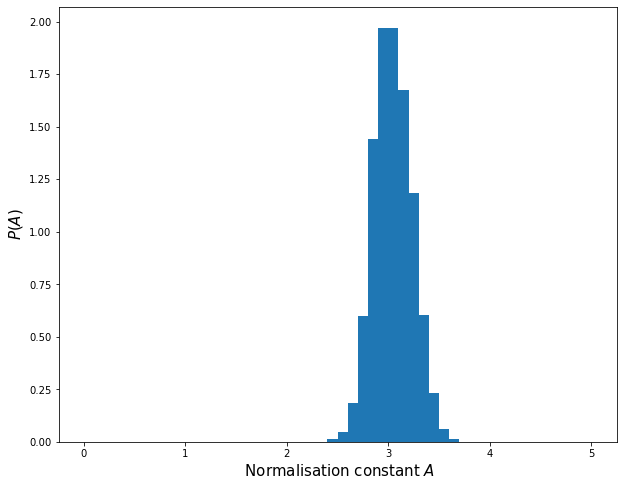

In [7]:
plt.rcParams['figure.figsize'] = (10,8)
plt.hist(A,
        #  bins = 101,
         bins = np.linspace(0,5,51),
         density = True,
        #  bins = np.linspace(0,20,501)
        )
# plt.xscale('log')
# plt.xlabel(r'$\chi^2/\nu$', fontsize = 15)
plt.xlabel(r' Normalisation constant $A$', fontsize = 15)
plt.ylabel(r'$P(A)$', fontsize = 15)
plt.show()

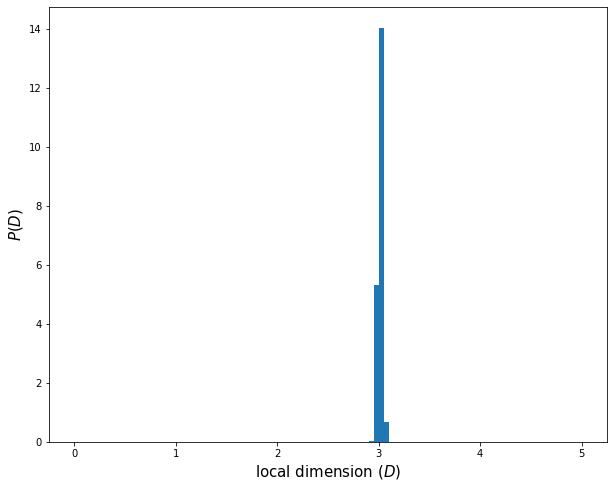

In [9]:
plt.rcParams['figure.figsize'] = (10,8)
plt.hist(D,
        #  bins = 501
         bins = np.linspace(0,5,101),
         density = True
        )
# plt.xlim(0,5)
plt.xlabel(r'local dimension ($D$)', fontsize = 15)
plt.ylabel(r'$P(D)$', fontsize = 15)
# plt.savefig('Dvals_64_10-20.png')
plt.show()

# $64^3$ uniform particle density L-values 10-20 (masses sampled from HMF)

In [7]:
n = 64
gs = 0.56
rmin = 10
rmax = 20
nr = 10
indir = '../outputs/output_uniform_particle_density_hmf/'
step = int((rmax - rmin)/nr)

In [8]:
r = []
N = []
L = []
struct_format = 'iiiif'

for i in range(rmin,rmax+1,step):
    r.append(i)
    rval = format(gs*i, '.2f')
    with open(f'{indir}N_values_{rval}Mpc','rb') as f:
        vals = []
        while True:
            data = f.read(struct.calcsize(struct_format))
            if not data:
                break
            integers = struct.unpack(struct_format, data)
            vals.append(integers)
        vals = np.array(vals)
        N.append(vals[:,3])
        L.append(vals[:,4])

pos = vals[:,:3]
r = np.array(r)
N = np.array(N)
L = np.array(L)

In [12]:
num = np.random.randint(n**3)
print(L[:,num])


[ 683.16101074 1111.16430664 1337.42993164 1522.81188965 1888.8137207
 2092.83886719 2463.1862793  2902.57495117 3228.76196289 3546.12158203
 4005.11083984]


In [4]:
f = open('../fit_results/uniform_density_Lvalues_10-20.bin', 'rb')
struct_format = 'iiifff'
size = struct.calcsize(struct_format)

# pos = []
A = []
D = []
# redchisq = []

while True:
    data = f.read(size)
    if not data:
        break
    vals = struct.unpack(struct_format, data)

    if vals[5] <= 1.2:
        # pos.append(np.array(vals[:3]))
        A.append(vals[3])
        D.append(vals[4])
        # redchisq.append(vals[5])

f.close()

# pos = np.array(pos)
A = np.array(A)
D = np.array(D)
# redchisq = np.array(redchisq)

In [5]:
print(np.min(D), np.max(D), np.mean(D))

1.6152503490447998 3.5692739486694336 2.856170305671791


In [6]:
np.mean(A)

1.1776370440105286

In [7]:
len(D)/n**3

0.00146484375

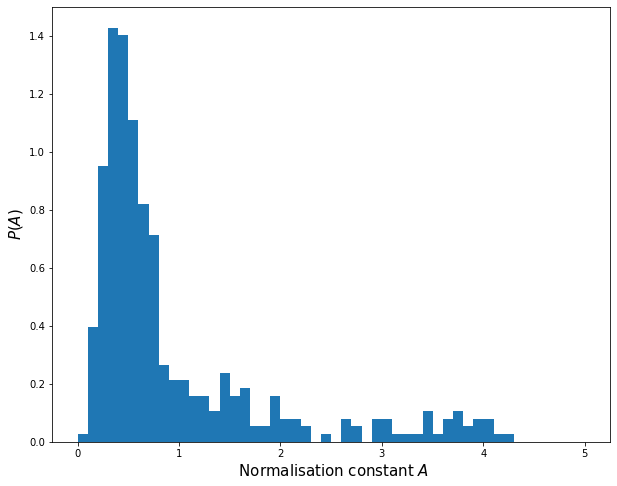

In [10]:
plt.rcParams['figure.figsize'] = (10,8)
plt.hist(A,
        #  bins = 101,
         bins = np.linspace(0,5,51),
         density = True,
        #  bins = np.linspace(0,20,501)
        )
# plt.xscale('log')
# plt.xlabel(r'$\chi^2/\nu$', fontsize = 15)
plt.xlabel(r' Normalisation constant $A$', fontsize = 15)
plt.ylabel(r'$P(A)$', fontsize = 15)
plt.show()

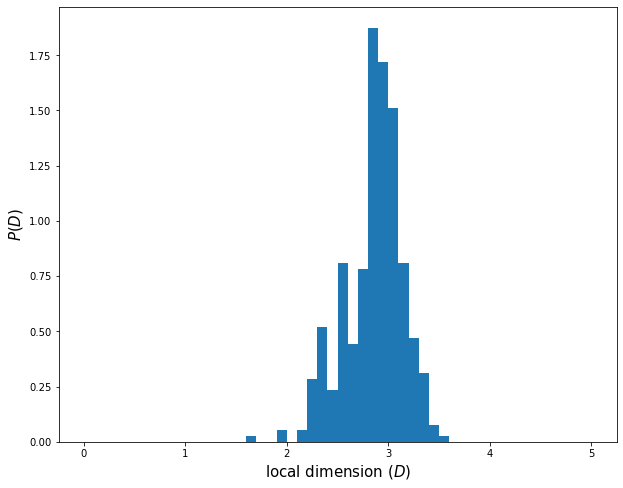

In [12]:
plt.rcParams['figure.figsize'] = (10,8)
plt.hist(D,
        #  bins = 501
         bins = np.linspace(0,5,51),
         density = True
        )
# plt.xlim(0,5)
plt.xlabel(r'local dimension ($D$)', fontsize = 15)
plt.ylabel(r'$P(D)$', fontsize = 15)
# plt.savefig('Dvals_64_10-20.png')
plt.show()

# $64^3$ uniform particle density 10-20 weighted (masses sampled from HMF)

In [14]:
n = 64
gs = 0.56
rmin = 10
rmax = 20
nr = 10
indir = '../outputs/output_uniform_weighted/'
step = int((rmax - rmin)/nr)

In [15]:
r = []
N = []
L = []
struct_format = 'iiiif'

for i in range(rmin,rmax+1,step):
    r.append(i)
    rval = format(gs*i, '.2f')
    with open(f'{indir}N_values_{rval}Mpc','rb') as f:
        vals = []
        while True:
            data = f.read(struct.calcsize(struct_format))
            if not data:
                break
            integers = struct.unpack(struct_format, data)
            vals.append(integers)
        vals = np.array(vals)
        N.append(vals[:,3])
        L.append(vals[:,4])

pos = vals[:,:3]
r = np.array(r)
N = np.array(N)
L = np.array(L)

In [16]:
num = np.random.randint(n**3)
print(L[:,num])


[2.45102288e+08 2.67603664e+08 3.32005248e+08 4.13483904e+08
 5.50090304e+08 6.44200640e+08 7.81596288e+08 9.90349568e+08
 1.14296154e+09 1.37563059e+09 1.62285990e+09]


In [17]:
f = open('../fit_results/Lvalues_weighted_10-20.bin', 'rb')
struct_format = 'iiifff'
size = struct.calcsize(struct_format)

# pos = []
A = []
D = []
# redchisq = []

while True:
    data = f.read(size)
    if not data:
        break
    vals = struct.unpack(struct_format, data)

    # if vals[5] <= 1.2:
    # pos.append(np.array(vals[:3]))
    A.append(vals[3])
    D.append(vals[4])
    # redchisq.append(vals[5])

f.close()

# pos = np.array(pos)
A = np.array(A)
D = np.array(D)
# redchisq = np.array(redchisq)

In [18]:
print(np.min(D), np.max(D), np.mean(D))

2.274387836456299 4.084288120269775 3.040509448117376


In [19]:
np.mean(A)

222653.98906803507

In [20]:
len(D)/n**3

0.99609375

/home/mohit211/.local/lib/python3.10/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: divide by zero encountered in divide
  return n/db/n.sum(), bin_edges
/home/mohit211/.local/lib/python3.10/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


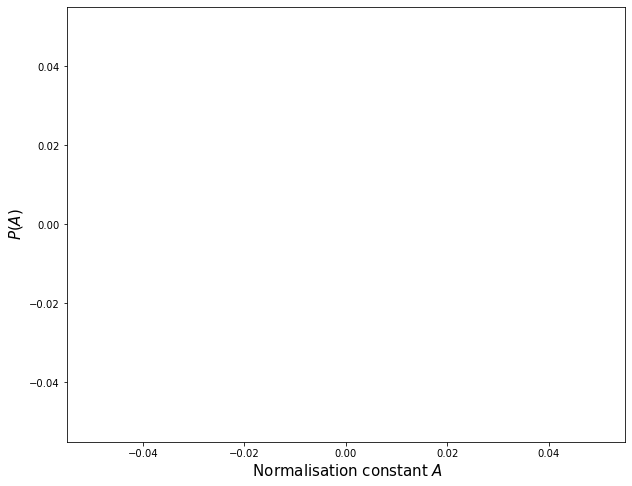

In [21]:
plt.rcParams['figure.figsize'] = (10,8)
plt.hist(A,
        #  bins = 101,
         bins = np.linspace(0,5,51),
         density = True,
        #  bins = np.linspace(0,20,501)
        )
# plt.xscale('log')
# plt.xlabel(r'$\chi^2/\nu$', fontsize = 15)
plt.xlabel(r' Normalisation constant $A$', fontsize = 15)
plt.ylabel(r'$P(A)$', fontsize = 15)
plt.show()

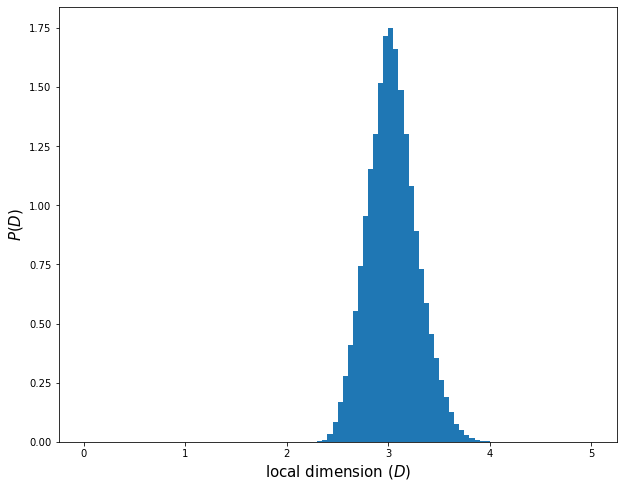

In [23]:
plt.rcParams['figure.figsize'] = (10,8)
plt.hist(D,
        #  bins = 501
         bins = np.linspace(0,5,101),
         density = True
        )
# plt.xlim(0,5)
plt.xlabel(r'local dimension ($D$)', fontsize = 15)
plt.ylabel(r'$P(D)$', fontsize = 15)
# plt.savefig('Dvals_64_10-20.png')
plt.show()

# $64^3$ uniform particle density cubic window 10-20 (masses sampled from HMF)

In [2]:
n = 64
gs = 0.56
rmin = 10
rmax = 20
nr = 10
indir = '../outputs/output_uniform_cubicwindow_hmf/'
step = int((rmax - rmin)/nr)

In [ ]:
r = []
N = []
L = []
struct_format = 'iiiif'

for i in range(rmin,rmax+1,step):
    r.append(i)
    rval = format(gs*i, '.2f')
    with open(f'{indir}N_values_{rval}Mpc','rb') as f:
        vals = []
        while True:
            data = f.read(struct.calcsize(struct_format))
            if not data:
                break
            integers = struct.unpack(struct_format, data)
            vals.append(integers)
        vals = np.array(vals)
        N.append(vals[:,3])
        L.append(vals[:,4])

pos = vals[:,:3]
r = np.array(r)
N = np.array(N)
L = np.array(L)

In [ ]:
num = np.random.randint(n**3)
print(N[:,num])


[ 3052.  4049.  5205.  6617.  8321. 10121. 12262. 14648. 17483. 20459.
 23849.]


In [3]:
f = open('../fit_results/Lvalues_cubic_10-20.bin', 'rb')
struct_format = 'iiifff'
size = struct.calcsize(struct_format)

# pos = []
A = []
D = []
# redchisq = []

while True:
    data = f.read(size)
    if not data:
        break
    vals = struct.unpack(struct_format, data)

    if vals[5] <= 1.2:
        # pos.append(np.array(vals[:3]))
        A.append(vals[3])
        D.append(vals[4])
        # redchisq.append(vals[5])

f.close()

# pos = np.array(pos)
A = np.array(A)
D = np.array(D)
# redchisq = np.array(redchisq)

In [4]:
print(np.min(D), np.max(D), np.mean(D))

0.0007845740765333176 0.21781767904758453 0.015251245971056687


In [5]:
np.mean(A)

823.1354117471576

In [6]:
len(D)/n**3

0.9809837341308594

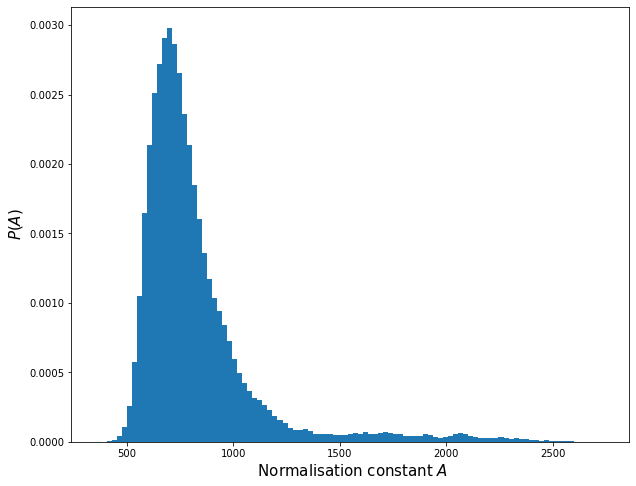

In [8]:
plt.rcParams['figure.figsize'] = (10,8)
plt.hist(A,
         bins = 101,
        #  bins = np.linspace(0,5,51),
         density = True,
        #  bins = np.linspace(0,20,501)
        )
# plt.xscale('log')
# plt.xlabel(r'$\chi^2/\nu$', fontsize = 15)
plt.xlabel(r' Normalisation constant $A$', fontsize = 15)
plt.ylabel(r'$P(A)$', fontsize = 15)
plt.show()

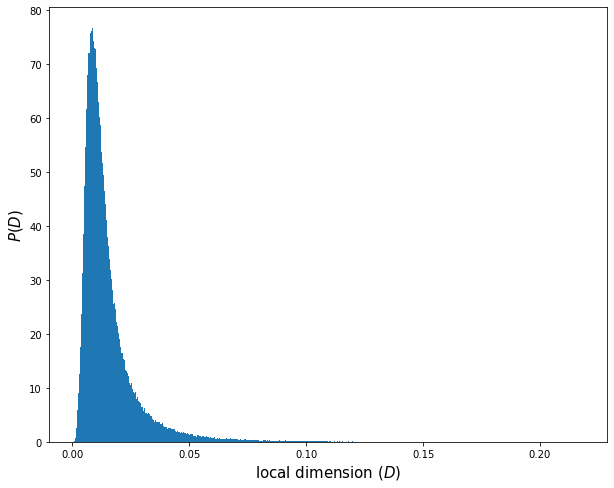

In [10]:
plt.rcParams['figure.figsize'] = (10,8)
plt.hist(D,
         bins = 501,
        #  bins = np.linspace(0,5,51),
         density = True
        )
# plt.xlim(0,5)
plt.xlabel(r'local dimension ($D$)', fontsize = 15)
plt.ylabel(r'$P(D)$', fontsize = 15)
# plt.savefig('Dvals_64_10-20.png')
plt.show()

# $384^3$ uniform particle density map 10-20 $\sigma = L/\sqrt{N}$

In [8]:
n = 384
gs = 0.56
rmin = 10
rmax = 20
nr = 10
# indir = '../outputs/output_64/'
step = int((rmax - rmin)/nr)

In [ ]:
r = []
N = []
L = []
struct_format = 'iiiif'

for i in range(rmin,rmax+1,step):
    r.append(i)
    rval = format(gs*i, '.2f')
    with open(f'{indir}N_values_{rval}Mpc','rb') as f:
        vals = []
        while True:
            data = f.read(struct.calcsize(struct_format))
            if not data:
                break
            integers = struct.unpack(struct_format, data)
            vals.append(integers)
        vals = np.array(vals)
        N.append(vals[:,3])
        L.append(vals[:,4])

pos = vals[:,:3]
r = np.array(r)
N = np.array(N)
L = np.array(L)

In [9]:
f = open('../fit_results/fit_results_uniform_384_10-20.bin', 'rb')
struct_format = 'iiifff'
size = struct.calcsize(struct_format)

# pos = []
# A = []
D = []
# redchisq = []

while True:
    data = f.read(size)
    if not data:
        break
    vals = struct.unpack(struct_format, data)

    if vals[5] <= 1.2:
        # pos.append(np.array(vals[:3]))
        # A.append(vals[3])
        D.append(vals[4])
        # redchisq.append(vals[5])

f.close()

# pos = np.array(pos)
# A = np.array(A)
D = np.array(D)
# redchisq = np.array(redchisq)

In [10]:
print(np.min(D), np.max(D), np.mean(D))

2.832380771636963 3.2038307189941406 3.0136342628698665


In [11]:
len(D)/n**3

0.3628235393100315

In [12]:
# plt.rcParams['figure.figsize'] = (10,8)
# plt.hist(redchisq,
#         #  bins = 101,
#          bins = np.linspace(0,2,101),
#         #  density = True,
#         #  bins = np.linspace(0,20,501)
#         )
# # plt.xscale('log')
# plt.xlabel(r'$\chi^2/\nu$', fontsize = 15)
# plt.ylabel('frequency', fontsize = 15)
# plt.show()

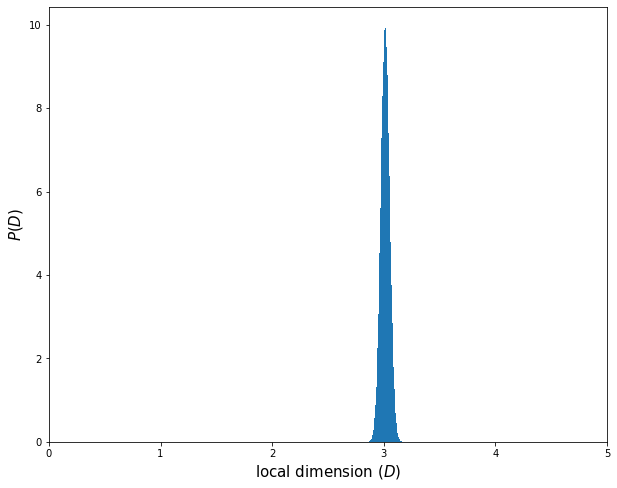

In [13]:
plt.rcParams['figure.figsize'] = (10,8)
plt.hist(D,
         bins = 101,
        #  bins = np.linspace(0,5,101),
         density = True
        )
plt.xlim(0,5)
plt.xlabel(r'local dimension ($D$)', fontsize = 15)
plt.ylabel(r'$P(D)$', fontsize = 15)
# plt.savefig('Dvals_384_10-20.png')
plt.show()

# $64^3$ custom filament 10-20 $\sigma = L/\sqrt{N}$

In [18]:
n = 64
gs = 0.56
rmin = 10
rmax = 20
nr = 10
indir = '../outputs/output_custom_filament/'
step = int((rmax - rmin)/nr)

In [19]:
r = []
N = []
L = []
struct_format = 'iiiif'

for i in range(rmin,rmax+1,step):
    r.append(i)
    rval = format(gs*i, '.2f')
    with open(f'{indir}N_values_{rval}Mpc','rb') as f:
        vals = []
        while True:
            data = f.read(struct.calcsize(struct_format))
            if not data:
                break
            integers = struct.unpack(struct_format, data)
            vals.append(integers)
        vals = np.array(vals)
        N.append(vals[:,3])
        L.append(vals[:,4])

pos = vals[:,:3]
r = np.array(r)
N = np.array(N)
L = np.array(L)

In [20]:
f = open('../fit_results/fit_results_custom_filament_10-20.bin', 'rb')
struct_format = 'iiifff'
size = struct.calcsize(struct_format)

pos = []
# A = []
D = []
# redchisq = []

while True:
    data = f.read(size)
    if not data:
        break
    vals = struct.unpack(struct_format, data)

    if vals[5] <= 1.2 and vals[0] == vals[1] == 30:
        pos.append(np.array(vals[:3]))
        # A.append(vals[3])
        D.append(vals[4])
        # redchisq.append(vals[5])

f.close()

pos = np.array(pos)
# A = np.array(A)
D = np.array(D)
# redchisq = np.array(redchisq)

In [21]:
print(np.min(D), np.max(D), np.mean(D))

1.036191463470459 1.036191463470459 1.036191463470459


In [22]:
len(D)/n

1.0

In [23]:
# plt.rcParams['figure.figsize'] = (10,8)
# plt.hist(redchisq,
#         #  bins = 101,
#          bins = np.linspace(0,2,101),
#         #  density = True,
#         #  bins = np.linspace(0,20,501)
#         )
# # plt.xscale('log')
# plt.xlabel(r'$\chi^2/\nu$', fontsize = 15)
# plt.ylabel('frequency', fontsize = 15)
# plt.show()

In [24]:
# plt.rcParams['figure.figsize'] = (10,8)
# plt.hist(D,
#          bins = 101,
#         #  bins = np.linspace(0,5,101),
#          density = True
#         )
# plt.xlim(0,3)
# plt.xlabel(r'local dimension ($D$)', fontsize = 15)
# plt.ylabel(r'$P(D)$', fontsize = 15)
# # plt.savefig('Dvals_384_10-20.png')
# plt.show()

# $64^3$ custom sheet 10-20 $\sigma = L/\sqrt{N}$

In [25]:
n = 64
gs = 0.56
rmin = 10
rmax = 20
nr = 10
indir = '../outputs/output_custom_sheet/'
step = int((rmax - rmin)/nr)

In [26]:
r = []
N = []
L = []
struct_format = 'iiiif'

for i in range(rmin,rmax+1,step):
    r.append(i)
    rval = format(gs*i, '.2f')
    with open(f'{indir}N_values_{rval}Mpc','rb') as f:
        vals = []
        while True:
            data = f.read(struct.calcsize(struct_format))
            if not data:
                break
            integers = struct.unpack(struct_format, data)
            vals.append(integers)
        vals = np.array(vals)
        N.append(vals[:,3])
        L.append(vals[:,4])

pos = vals[:,:3]
r = np.array(r)
N = np.array(N)
L = np.array(L)

In [28]:
f = open('../fit_results/fit_results_custom_sheet_10-20.bin', 'rb')
struct_format = 'iiifff'
size = struct.calcsize(struct_format)

pos = []
# A = []
D = []
# redchisq = []

while True:
    data = f.read(size)
    if not data:
        break
    vals = struct.unpack(struct_format, data)

    if vals[5] <= 1.2 and vals[2] == 30:
        pos.append(np.array(vals[:3]))
        # A.append(vals[3])
        D.append(vals[4])
        # redchisq.append(vals[5])

f.close()

pos = np.array(pos)
# A = np.array(A)
D = np.array(D)
# redchisq = np.array(redchisq)

In [29]:
print(np.min(D), np.max(D), np.mean(D))

2.0292091369628906 2.0292091369628906 2.0292091369628906


In [30]:
len(D)/n**2

0.99609375

# $384^3$ N-values 2-9 

In [2]:
n = 384
gs = 0.56
rmin = 2
rmax = 9
nr = 7
# indir = '../outputs/output_custom_sheet/'
step = int((rmax - rmin)/nr)

In [3]:
# r = []
# N = []
# L = []
# struct_format = 'iiiif'

# for i in range(rmin,rmax+1,step):
#     r.append(i)
#     rval = format(gs*i, '.2f')
#     with open(f'{indir}N_values_{rval}Mpc','rb') as f:
#         vals = []
#         while True:
#             data = f.read(struct.calcsize(struct_format))
#             if not data:
#                 break
#             integers = struct.unpack(struct_format, data)
#             vals.append(integers)
#         vals = np.array(vals)
#         N.append(vals[:,3])
#         L.append(vals[:,4])

# pos = vals[:,:3]
# r = np.array(r)
# N = np.array(N)
# L = np.array(L)

In [48]:
f = open(f'../fit_results/Nvalues_{rmin}-{rmax}.bin', 'rb')
struct_format = 'iiifff'
size = struct.calcsize(struct_format)

# pos = []
# A = []
D = []
# redchisq = []

while True:
    data = f.read(size)
    if not data:
        break
    vals = struct.unpack(struct_format, data)

    if vals[5] <= 1.2:
        # pos.append(np.array(vals[:3]))
        # A.append(vals[3])
        D.append(vals[4])
        # redchisq.append(vals[5])

f.close()

# pos = np.array(pos)
# A = np.array(A)
D = np.array(D)
# redchisq = np.array(redchisq)

In [49]:
print(np.min(D), np.max(D), np.mean(D))

1.136470079421997 21.511560440063477 3.1282573606551582


In [50]:
len(D)/n**3

0.5113184187147353

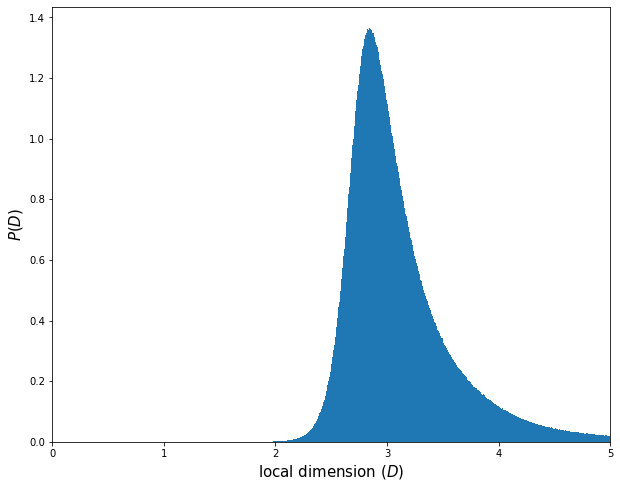

In [51]:
plt.rcParams['figure.figsize'] = (10,8)
counts, bins, patches = plt.hist(D,
                                 bins = np.linspace(0,5,1001),
                                 density = True
                                 )
plt.xlim(0,5)
plt.xlabel(r'local dimension ($D$)', fontsize = 15)
plt.ylabel(r'$P(D)$', fontsize = 15)
# plt.savefig('Dvals_384_10-20.png')
plt.show()

In [52]:
bins[np.argmax(counts)]

2.845

# $384^3$ N-values 2-18

In [53]:
n = 384
gs = 0.56
rmin = 2
rmax = 18
nr = 16
# indir = '../outputs/output_custom_sheet/'
step = int((rmax - rmin)/nr)

In [54]:
# r = []
# N = []
# L = []
# struct_format = 'iiiif'

# for i in range(rmin,rmax+1,step):
#     r.append(i)
#     rval = format(gs*i, '.2f')
#     with open(f'{indir}N_values_{rval}Mpc','rb') as f:
#         vals = []
#         while True:
#             data = f.read(struct.calcsize(struct_format))
#             if not data:
#                 break
#             integers = struct.unpack(struct_format, data)
#             vals.append(integers)
#         vals = np.array(vals)
#         N.append(vals[:,3])
#         L.append(vals[:,4])

# pos = vals[:,:3]
# r = np.array(r)
# N = np.array(N)
# L = np.array(L)

In [55]:
f = open(f'../fit_results/Nvalues_{rmin}-{rmax}.bin', 'rb')
struct_format = 'iiifff'
size = struct.calcsize(struct_format)

# pos = []
# A = []
D = []
# redchisq = []

while True:
    data = f.read(size)
    if not data:
        break
    vals = struct.unpack(struct_format, data)

    if vals[5] <= 1.2:
        # pos.append(np.array(vals[:3]))
        # A.append(vals[3])
        D.append(vals[4])
        # redchisq.append(vals[5])

f.close()

# pos = np.array(pos)
# A = np.array(A)
D = np.array(D)
# redchisq = np.array(redchisq)

In [56]:
print(np.min(D), np.max(D), np.mean(D))

2.222517490386963 6.133642673492432 2.9715880102552763


In [57]:
len(D)/n**3

0.13930368423461914

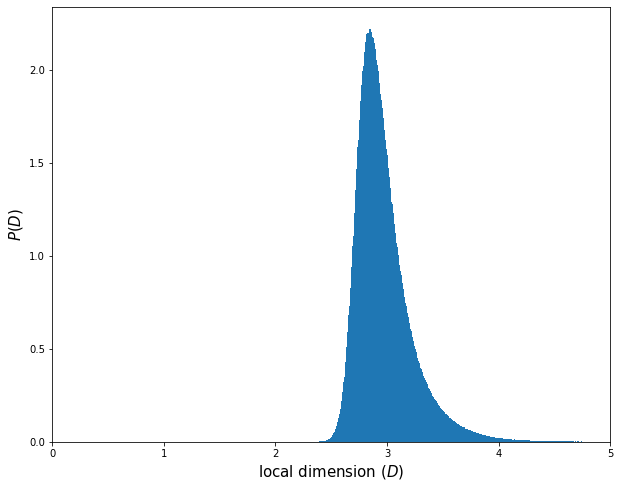

In [59]:
plt.rcParams['figure.figsize'] = (10,8)
counts, bins, patches = plt.hist(D,
                                 bins = np.linspace(0,5,1001),
                                 density = True
                                 )
plt.xlim(0,5)
plt.xlabel(r'local dimension ($D$)', fontsize = 15)
plt.ylabel(r'$P(D)$', fontsize = 15)
# plt.savefig('Dvals_384_10-20.png')
plt.show()

In [60]:
bins[np.argmax(counts)]

2.845

# $384^3$ N-values 10-20

In [4]:
n = 384
gs = 0.56
rmin = 10
rmax = 20
nr = 10
# indir = '../outputs/output_custom_sheet/'
step = int((rmax - rmin)/nr)

In [5]:
# r = []
# N = []
# L = []
# struct_format = 'iiiif'

# for i in range(rmin,rmax+1,step):
#     r.append(i)
#     rval = format(gs*i, '.2f')
#     with open(f'{indir}N_values_{rval}Mpc','rb') as f:
#         vals = []
#         while True:
#             data = f.read(struct.calcsize(struct_format))
#             if not data:
#                 break
#             integers = struct.unpack(struct_format, data)
#             vals.append(integers)
#         vals = np.array(vals)
#         N.append(vals[:,3])
#         L.append(vals[:,4])

# pos = vals[:,:3]
# r = np.array(r)
# N = np.array(N)
# L = np.array(L)

In [6]:
f = open(f'../fit_results/Nvalues_{rmin}-{rmax}.bin', 'rb')
struct_format = 'iiifff'
size = struct.calcsize(struct_format)

# pos = []
# A = []
D = []
# redchisq = []

while True:
    data = f.read(size)
    if not data:
        break
    vals = struct.unpack(struct_format, data)

    if vals[5] <= 1.2:
        # pos.append(np.array(vals[:3]))
        # A.append(vals[3])
        D.append(vals[4])
        # redchisq.append(vals[5])

f.close()

# pos = np.array(pos)
# A = np.array(A)
D = np.array(D)
# redchisq = np.array(redchisq)

In [64]:
print(np.min(D), np.max(D), np.mean(D))

2.1016013622283936 5.717413425445557 2.9864487898618117


In [65]:
len(D)/n**3

0.45767303749367044

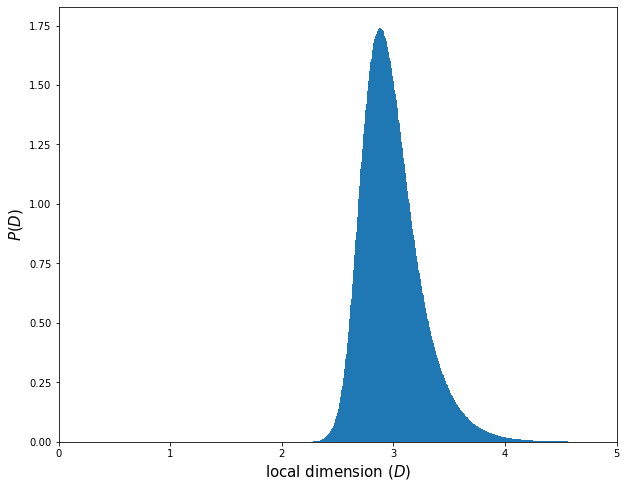

In [66]:
plt.rcParams['figure.figsize'] = (10,8)
counts, bins, patches = plt.hist(D,
                                 bins = np.linspace(0,5,1001),
                                 density = True
                                 )
plt.xlim(0,5)
plt.xlabel(r'local dimension ($D$)', fontsize = 15)
plt.ylabel(r'$P(D)$', fontsize = 15)
# plt.savefig('Dvals_384_10-20.png')
plt.show()

In [67]:
bins[np.argmax(counts)]

2.87

# $384^3$ N-values 10-36

In [68]:
n = 384
gs = 0.56
rmin = 10
rmax = 36
nr = 13
# indir = '../outputs/output_custom_sheet/'
step = int((rmax - rmin)/nr)

In [69]:
# r = []
# N = []
# L = []
# struct_format = 'iiiif'

# for i in range(rmin,rmax+1,step):
#     r.append(i)
#     rval = format(gs*i, '.2f')
#     with open(f'{indir}N_values_{rval}Mpc','rb') as f:
#         vals = []
#         while True:
#             data = f.read(struct.calcsize(struct_format))
#             if not data:
#                 break
#             integers = struct.unpack(struct_format, data)
#             vals.append(integers)
#         vals = np.array(vals)
#         N.append(vals[:,3])
#         L.append(vals[:,4])

# pos = vals[:,:3]
# r = np.array(r)
# N = np.array(N)
# L = np.array(L)

In [70]:
f = open(f'../fit_results/Nvalues_{rmin}-{rmax}.bin', 'rb')
struct_format = 'iiifff'
size = struct.calcsize(struct_format)

# pos = []
# A = []
D = []
# redchisq = []

while True:
    data = f.read(size)
    if not data:
        break
    vals = struct.unpack(struct_format, data)

    if vals[5] <= 1.2:
        # pos.append(np.array(vals[:3]))
        # A.append(vals[3])
        D.append(vals[4])
        # redchisq.append(vals[5])

f.close()

# pos = np.array(pos)
# A = np.array(A)
D = np.array(D)
# redchisq = np.array(redchisq)

In [71]:
print(np.min(D), np.max(D), np.mean(D))

2.477743148803711 4.098544120788574 2.935745810780016


In [72]:
len(D)/n**3

0.027006767414234304

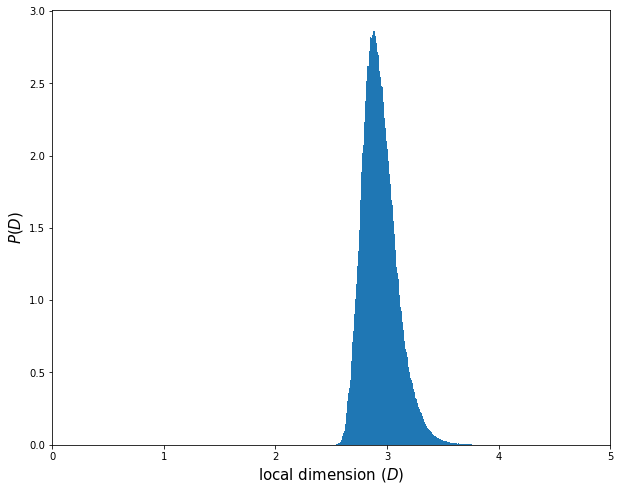

In [73]:
plt.rcParams['figure.figsize'] = (10,8)
counts, bins, patches = plt.hist(D,
                                 bins = np.linspace(0,5,1001),
                                 density = True
                                 )
plt.xlim(0,5)
plt.xlabel(r'local dimension ($D$)', fontsize = 15)
plt.ylabel(r'$P(D)$', fontsize = 15)
# plt.savefig('Dvals_384_10-20.png')
plt.show()

In [74]:
bins[np.argmax(counts)]

2.8850000000000002

# $384^3$ N-values 10-90

In [75]:
n = 384
gs = 0.56
rmin = 10
rmax = 90
nr = 16
# indir = '../outputs/output_custom_sheet/'
step = int((rmax - rmin)/nr)

In [76]:
# r = []
# N = []
# L = []
# struct_format = 'iiiif'

# for i in range(rmin,rmax+1,step):
#     r.append(i)
#     rval = format(gs*i, '.2f')
#     with open(f'{indir}N_values_{rval}Mpc','rb') as f:
#         vals = []
#         while True:
#             data = f.read(struct.calcsize(struct_format))
#             if not data:
#                 break
#             integers = struct.unpack(struct_format, data)
#             vals.append(integers)
#         vals = np.array(vals)
#         N.append(vals[:,3])
#         L.append(vals[:,4])

# pos = vals[:,:3]
# r = np.array(r)
# N = np.array(N)
# L = np.array(L)

In [77]:
f = open(f'../fit_results/Nvalues_{rmin}-{rmax}.bin', 'rb')
struct_format = 'iiifff'
size = struct.calcsize(struct_format)

# pos = []
# A = []
D = []
# redchisq = []

while True:
    data = f.read(size)
    if not data:
        break
    vals = struct.unpack(struct_format, data)

    if vals[5] <= 1.2:
        # pos.append(np.array(vals[:3]))
        # A.append(vals[3])
        D.append(vals[4])
        # redchisq.append(vals[5])

f.close()

# pos = np.array(pos)
# A = np.array(A)
D = np.array(D)
# redchisq = np.array(redchisq)

In [78]:
print(np.min(D), np.max(D), np.mean(D))

2.805318832397461 3.164828062057495 2.932791978579301


In [79]:
len(D)/n**3

4.591765227141204e-06

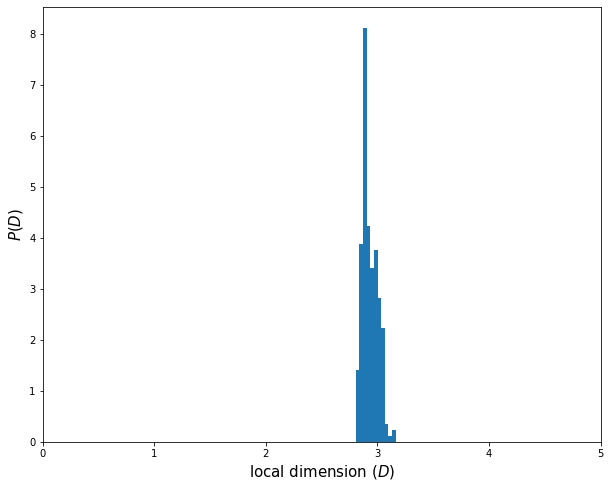

In [87]:
plt.rcParams['figure.figsize'] = (10,8)
counts, bins, patches = plt.hist(D,
                                 bins = 11,
                                #  bins = np.linspace(0,5,51),
                                 density = True
                                 )
plt.xlim(0,5)
plt.xlabel(r'local dimension ($D$)', fontsize = 15)
plt.ylabel(r'$P(D)$', fontsize = 15)
# plt.savefig('Dvals_384_10-20.png')
plt.show()

In [88]:
bins[np.argmax(counts)]

2.8706841468811035

# $384^3$ L-values 2-9 

In [2]:
n = 384
gs = 0.56
rmin = 2
rmax = 9
nr = 7
# indir = '../outputs/output_custom_sheet/'
step = int((rmax - rmin)/nr)

In [3]:
# r = []
# N = []
# L = []
# struct_format = 'iiiif'

# for i in range(rmin,rmax+1,step):
#     r.append(i)
#     rval = format(gs*i, '.2f')
#     with open(f'{indir}N_values_{rval}Mpc','rb') as f:
#         vals = []
#         while True:
#             data = f.read(struct.calcsize(struct_format))
#             if not data:
#                 break
#             integers = struct.unpack(struct_format, data)
#             vals.append(integers)
#         vals = np.array(vals)
#         N.append(vals[:,3])
#         L.append(vals[:,4])

# pos = vals[:,:3]
# r = np.array(r)
# N = np.array(N)
# L = np.array(L)

In [4]:
f = open(f'../fit_results/Lvalues_{rmin}-{rmax}.bin', 'rb')
struct_format = 'iiifff'
size = struct.calcsize(struct_format)

# pos = []
# A = []
D = []
# redchisq = []

while True:
    data = f.read(size)
    if not data:
        break
    vals = struct.unpack(struct_format, data)

    if vals[5] <= 1.2:
        # pos.append(np.array(vals[:3]))
        # A.append(vals[3])
        D.append(vals[4])
        # redchisq.append(vals[5])

f.close()

# pos = np.array(pos)
# A = np.array(A)
D = np.array(D)
# redchisq = np.array(redchisq)

In [5]:
print(np.min(D), np.max(D), np.mean(D))

0.23625043034553528 49.51384353637695 3.1102236833038646


In [6]:
len(D)/n**3

0.007726227795636213

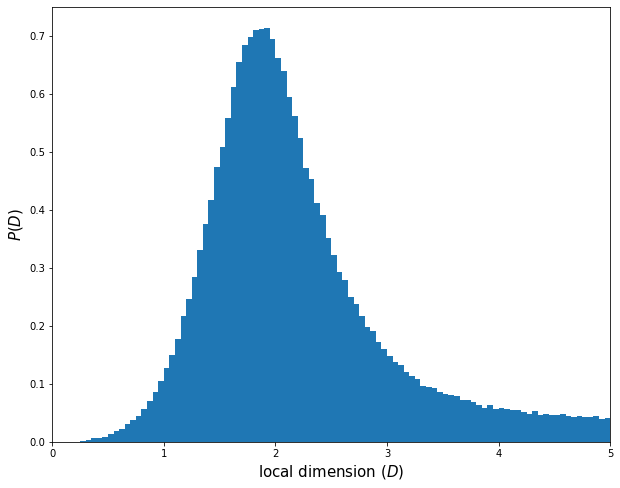

In [9]:
plt.rcParams['figure.figsize'] = (10,8)
counts, bins, patches = plt.hist(D,
                                 bins = np.linspace(0,5,101),
                                 density = True
                                 )
plt.xlim(0,5)
plt.xlabel(r'local dimension ($D$)', fontsize = 15)
plt.ylabel(r'$P(D)$', fontsize = 15)
# plt.savefig('Dvals_384_10-20.png')
plt.show()

In [10]:
bins[np.argmax(counts)]

1.9000000000000001

# $384^3$ L-values 2-18

In [11]:
n = 384
gs = 0.56
rmin = 2
rmax = 18
nr = 16
# indir = '../outputs/output_custom_sheet/'
step = int((rmax - rmin)/nr)

In [12]:
# r = []
# N = []
# L = []
# struct_format = 'iiiif'

# for i in range(rmin,rmax+1,step):
#     r.append(i)
#     rval = format(gs*i, '.2f')
#     with open(f'{indir}N_values_{rval}Mpc','rb') as f:
#         vals = []
#         while True:
#             data = f.read(struct.calcsize(struct_format))
#             if not data:
#                 break
#             integers = struct.unpack(struct_format, data)
#             vals.append(integers)
#         vals = np.array(vals)
#         N.append(vals[:,3])
#         L.append(vals[:,4])

# pos = vals[:,:3]
# r = np.array(r)
# N = np.array(N)
# L = np.array(L)

In [13]:
f = open(f'../fit_results/Lvalues_{rmin}-{rmax}.bin', 'rb')
struct_format = 'iiifff'
size = struct.calcsize(struct_format)

# pos = []
# A = []
D = []
# redchisq = []

while True:
    data = f.read(size)
    if not data:
        break
    vals = struct.unpack(struct_format, data)

    if vals[5] <= 1.2:
        # pos.append(np.array(vals[:3]))
        # A.append(vals[3])
        D.append(vals[4])
        # redchisq.append(vals[5])

f.close()

# pos = np.array(pos)
# A = np.array(A)
D = np.array(D)
# redchisq = np.array(redchisq)

In [14]:
print(np.min(D), np.max(D), np.mean(D))

1.3270472288131714 5.273548126220703 2.067669336023486


In [15]:
len(D)/n**3

5.637274848090278e-05

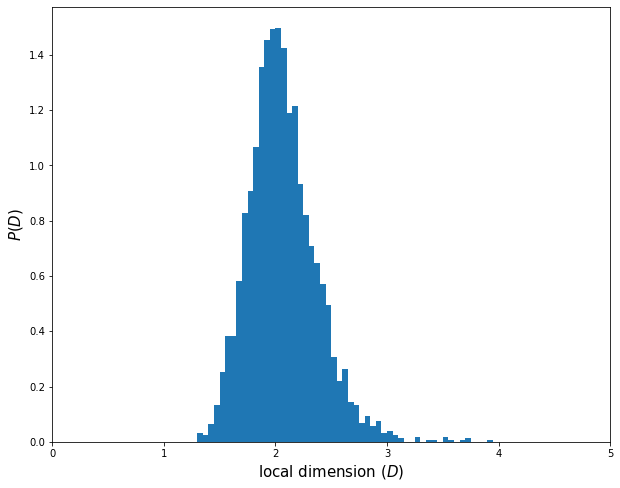

In [16]:
plt.rcParams['figure.figsize'] = (10,8)
counts, bins, patches = plt.hist(D,
                                 bins = np.linspace(0,5,101),
                                 density = True
                                 )
plt.xlim(0,5)
plt.xlabel(r'local dimension ($D$)', fontsize = 15)
plt.ylabel(r'$P(D)$', fontsize = 15)
# plt.savefig('Dvals_384_10-20.png')
plt.show()

In [17]:
bins[np.argmax(counts)]

2.0

# $384^3$ L-values 10-20

In [18]:
n = 384
gs = 0.56
rmin = 10
rmax = 20
nr = 10
# indir = '../outputs/output_custom_sheet/'
step = int((rmax - rmin)/nr)

In [19]:
# r = []
# N = []
# L = []
# struct_format = 'iiiif'

# for i in range(rmin,rmax+1,step):
#     r.append(i)
#     rval = format(gs*i, '.2f')
#     with open(f'{indir}N_values_{rval}Mpc','rb') as f:
#         vals = []
#         while True:
#             data = f.read(struct.calcsize(struct_format))
#             if not data:
#                 break
#             integers = struct.unpack(struct_format, data)
#             vals.append(integers)
#         vals = np.array(vals)
#         N.append(vals[:,3])
#         L.append(vals[:,4])

# pos = vals[:,:3]
# r = np.array(r)
# N = np.array(N)
# L = np.array(L)

In [21]:
f = open(f'../fit_results/Lvalues_{rmin}-{rmax}.bin', 'rb')
struct_format = 'iiifff'
size = struct.calcsize(struct_format)

# pos = []
# A = []
D = []
# redchisq = []

while True:
    data = f.read(size)
    if not data:
        break
    vals = struct.unpack(struct_format, data)

    if vals[5] <= 1.2:
        # pos.append(np.array(vals[:3]))
        # A.append(vals[3])
        D.append(vals[4])
        # redchisq.append(vals[5])

f.close()

# pos = np.array(pos)
# A = np.array(A)
D = np.array(D)
# redchisq = np.array(redchisq)

In [22]:
print(np.min(D), np.max(D), np.mean(D))

0.9167269468307495 7.140041828155518 2.343853413147254


In [23]:
len(D)/n**3

0.0064041879442003034

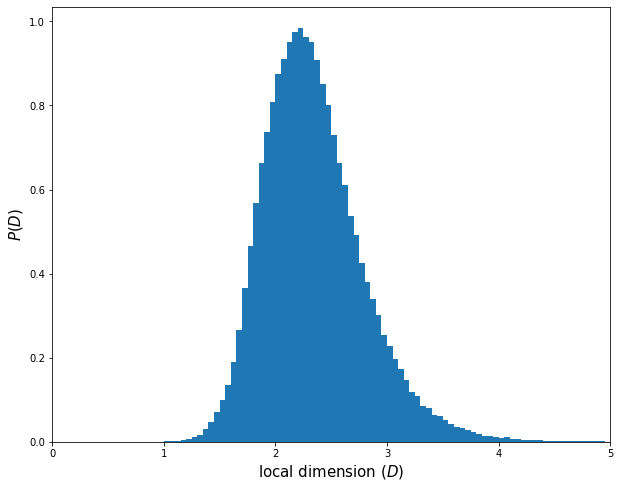

In [24]:
plt.rcParams['figure.figsize'] = (10,8)
counts, bins, patches = plt.hist(D,
                                 bins = np.linspace(0,5,101),
                                 density = True
                                 )
plt.xlim(0,5)
plt.xlabel(r'local dimension ($D$)', fontsize = 15)
plt.ylabel(r'$P(D)$', fontsize = 15)
# plt.savefig('Dvals_384_10-20.png')
plt.show()

In [25]:
bins[np.argmax(counts)]

2.2

# $384^3$ L-values 10-36

In [26]:
n = 384
gs = 0.56
rmin = 10
rmax = 36
nr = 13
# indir = '../outputs/output_custom_sheet/'
step = int((rmax - rmin)/nr)

In [27]:
# r = []
# N = []
# L = []
# struct_format = 'iiiif'

# for i in range(rmin,rmax+1,step):
#     r.append(i)
#     rval = format(gs*i, '.2f')
#     with open(f'{indir}N_values_{rval}Mpc','rb') as f:
#         vals = []
#         while True:
#             data = f.read(struct.calcsize(struct_format))
#             if not data:
#                 break
#             integers = struct.unpack(struct_format, data)
#             vals.append(integers)
#         vals = np.array(vals)
#         N.append(vals[:,3])
#         L.append(vals[:,4])

# pos = vals[:,:3]
# r = np.array(r)
# N = np.array(N)
# L = np.array(L)

In [28]:
f = open(f'../fit_results/Lvalues_{rmin}-{rmax}.bin', 'rb')
struct_format = 'iiifff'
size = struct.calcsize(struct_format)

# pos = []
# A = []
D = []
# redchisq = []

while True:
    data = f.read(size)
    if not data:
        break
    vals = struct.unpack(struct_format, data)

    if vals[5] <= 1.2:
        # pos.append(np.array(vals[:3]))
        # A.append(vals[3])
        D.append(vals[4])
        # redchisq.append(vals[5])

f.close()

# pos = np.array(pos)
# A = np.array(A)
D = np.array(D)
# redchisq = np.array(redchisq)

In [29]:
print(np.min(D), np.max(D), np.mean(D))

1.8432462215423584 3.56794810295105 2.4043861435194867


In [30]:
len(D)/n**3

6.128240514684606e-06

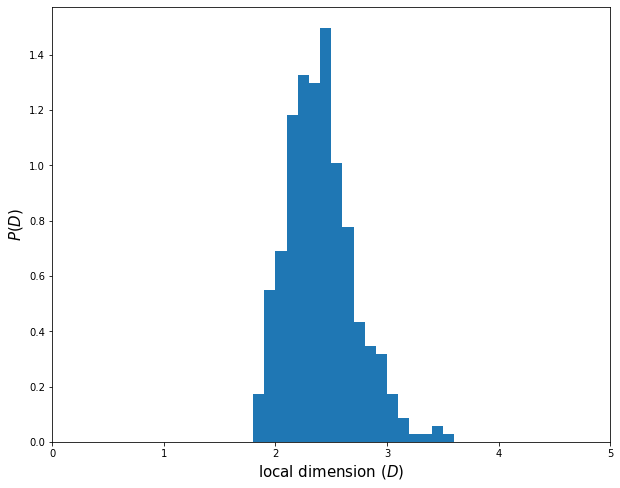

In [33]:
plt.rcParams['figure.figsize'] = (10,8)
counts, bins, patches = plt.hist(D,
                                 bins = np.linspace(0,5,51),
                                 density = True
                                 )
plt.xlim(0,5)
plt.xlabel(r'local dimension ($D$)', fontsize = 15)
plt.ylabel(r'$P(D)$', fontsize = 15)
# plt.savefig('Dvals_384_10-20.png')
plt.show()

In [32]:
bins[np.argmax(counts)]

2.4000000000000004

# $384^3$ L-values 10-90

In [39]:
n = 384
gs = 0.56
rmin = 10
rmax = 90
nr = 16
# indir = '../outputs/output_custom_sheet/'
step = int((rmax - rmin)/nr)

In [40]:
# r = []
# N = []
# L = []
# struct_format = 'iiiif'

# for i in range(rmin,rmax+1,step):
#     r.append(i)
#     rval = format(gs*i, '.2f')
#     with open(f'{indir}N_values_{rval}Mpc','rb') as f:
#         vals = []
#         while True:
#             data = f.read(struct.calcsize(struct_format))
#             if not data:
#                 break
#             integers = struct.unpack(struct_format, data)
#             vals.append(integers)
#         vals = np.array(vals)
#         N.append(vals[:,3])
#         L.append(vals[:,4])

# pos = vals[:,:3]
# r = np.array(r)
# N = np.array(N)
# L = np.array(L)

In [45]:
f = open(f'../fit_results/Lvalues_{rmin}-{rmax}.bin', 'rb')
struct_format = 'iiifff'
size = struct.calcsize(struct_format)

# pos = []
# A = []
# D = []
redchisq = []

while True:
    data = f.read(size)
    if not data:
        break
    vals = struct.unpack(struct_format, data)

    # if vals[5] <= 1.2:
    # pos.append(np.array(vals[:3]))
    # A.append(vals[3])
    # D.append(vals[4])
    redchisq.append(vals[5])

f.close()

# pos = np.array(pos)
# A = np.array(A)
# D = np.array(D)
redchisq = np.array(redchisq)

In [42]:
len(D)

0

In [46]:
# 
print(np.min(redchisq), np.max(redchisq), np.mean(redchisq))

4.095400810241699 441923.46875 1009.4300623223627


In [44]:
len(D)/n**3

0.0

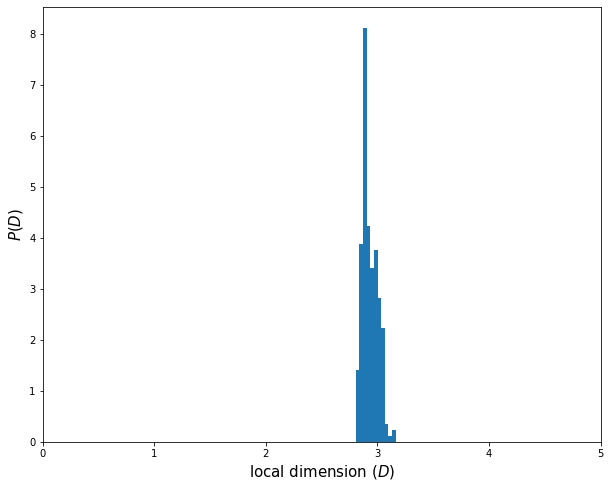

In [ ]:
plt.rcParams['figure.figsize'] = (10,8)
counts, bins, patches = plt.hist(D,
                                #  bins = 11,
                                 bins = np.linspace(0,5,51),
                                 density = True
                                 )
plt.xlim(0,5)
plt.xlabel(r'local dimension ($D$)', fontsize = 15)
plt.ylabel(r'$P(D)$', fontsize = 15)
# plt.savefig('Dvals_384_10-20.png')
plt.show()

In [ ]:
bins[np.argmax(counts)]

2.8706841468811035

In [89]:
bins[np.argmax(counts)]

2.9000000000000004

# $540^3$ $z=0$ 10-20

In [2]:
n = 540
gs = 0.5603704
rmin = 10
rmax = 20
nr = 10
# indir = '../outputs/output_custom_sheet/'
step = int((rmax - rmin)/nr)

In [3]:
f = open(f'../fit_results/Nvalues_z0.000_540^3.bin', 'rb')
struct_format = 'iiifff'
size = struct.calcsize(struct_format)

# pos = []
# A = []
D = []
# redchisq = []

while True:
    data = f.read(size)
    if not data:
        break
    vals = struct.unpack(struct_format, data)

    if vals[5] <= 1.2:
        # pos.append(np.array(vals[:3]))
        # A.append(vals[3])
        D.append(vals[4])
        # redchisq.append(vals[5])

f.close()

# pos = np.array(pos)
# A = np.array(A)
D = np.array(D)
# redchisq = np.array(redchisq)

In [4]:
len(D)/n**3

0.9999758484478992

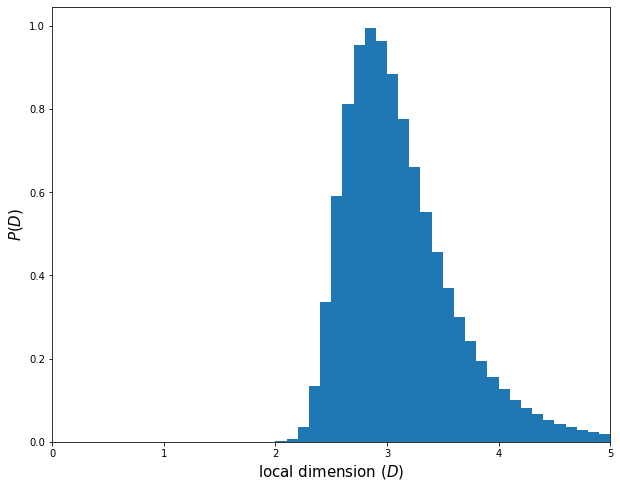

In [5]:
plt.rcParams['figure.figsize'] = (10,8)
counts, bins, patches = plt.hist(D,
                                #  bins = 11,
                                 bins = np.linspace(0,5,51),
                                 density = True
                                 )
plt.xlim(0,5)
plt.xlabel(r'local dimension ($D$)', fontsize = 15)
plt.ylabel(r'$P(D)$', fontsize = 15)
# plt.savefig('Dvals_384_10-20.png')
plt.show()

In [ ]:
bins[np.argmax(counts)]

2.8706841468811035

In [ ]:
bins[np.argmax(counts)]

2.9000000000000004